# extract accuracies

In [1]:
file_path = 'logs/test.txt'


In [8]:
import os

def extract_class_accuracy_from_file(file_path, last_n_lines=None):
    """
    Extracts class numbers and their corresponding accuracies from the last few lines of a text file.
    
    Args:
    file_path (str): Path to the text file.
    last_n_lines (int): Number of lines from the end of the file to read. If None, reads the entire file.
    
    Returns:
    dict: A dictionary with class numbers as keys and accuracies as values.
    """
    class_accuracy_dict = {}
    try:
        with open(file_path, 'r') as file:
            if last_n_lines is not None:
                # Seek to the end of the file and read last_n_lines
                lines = file.readlines()[-last_n_lines:]
            else:
                # Read all lines in the file
                lines = file.readlines()

            for line in lines:
                # Process each line as before
                parts = line.split(' = ')
                if len(parts) == 2:
                    class_number = parts[0].split('/')[-1]
                    accuracy = float(parts[1])
                    class_accuracy_dict[int(class_number)] = accuracy
    except Exception as e:
        print(f"Error reading from file: {e}")
    
    return class_accuracy_dict



In [ ]:
new_ocl_cifar_60real_nosynsyn_step16_all500test_knn10
new_ocl_cifar_60real_40synsyni2i_step16_all500test_knn10

In [40]:
# Example usage
file_path = 'logs/synreal_aecb64d256e10_realsyns5g2_synsyn10percenti2is8g2.txt'
file_path = 'logs/imagenet_synrealallprompti2i_synsyni2is8g2.txt'
file_path = '/storage3/enbo/logs/fixedbuffer_cifar_60synreallesspromptallimage_40samenumsynlesspromptsallimage_testall_knn10.txt'
file_path = 'logs/new_ocl_imagenet_80real_nosynsyn.txt'
file_path = 'logs/new_ocl_cifar_60real_40synsyni2i_step16_all500test_knn10.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)

{0: 0.984, 1: 0.986, 10: 0.734, 11: 0.598, 12: 0.9, 13: 0.92, 14: 0.926, 15: 0.978, 16: 0.928, 17: 0.964, 18: 0.892, 19: 0.982, 2: 0.888, 20: 0.98, 21: 0.994, 22: 0.968, 23: 0.838, 24: 0.958, 25: 0.902, 26: 0.894, 27: 0.896, 28: 0.95, 29: 0.98, 3: 0.942, 30: 0.938, 31: 0.966, 32: 0.832, 33: 0.724, 34: 0.98, 35: 0.698, 36: 0.976, 37: 0.844, 38: 0.982, 39: 0.988, 4: 0.84, 40: 0.906, 41: 0.98, 42: 0.912, 43: 0.984, 44: 0.902, 45: 0.9, 46: 0.766, 47: 0.746, 48: 0.994, 49: 0.924, 5: 0.98, 50: 0.852, 51: 0.97, 52: 0.858, 53: 0.988, 54: 0.974, 55: 0.812, 56: 0.98, 57: 0.902, 58: 0.816, 59: 0.72, 6: 0.88, 60: 0.806, 61: 0.964, 62: 0.96, 63: 0.902, 64: 0.868, 65: 0.942, 66: 0.948, 67: 0.936, 68: 0.936, 69: 0.96, 7: 0.89, 70: 0.978, 71: 0.89, 72: 0.86, 73: 0.892, 74: 0.81, 75: 0.948, 76: 0.972, 77: 0.972, 78: 0.956, 79: 0.844, 8: 0.976, 80: 0.95, 81: 0.924, 82: 0.984, 83: 0.97, 84: 0.934, 85: 0.964, 86: 0.982, 87: 0.938, 88: 0.974, 89: 0.95, 9: 0.972, 90: 0.936, 91: 0.94, 92: 0.92, 93: 0.968, 94

In [41]:
sum(accuracy_dict.values())/100

0.9145599999999999

In [42]:
order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]
syn_classes = [order[3:] for order in order_list]
syn_classes = [item for lists in syn_classes for item in lists]
print(syn_classes)

[5, 20, 83, 19, 62, 33, 74, 53, 4, 32, 40, 41, 64, 21, 49, 68, 65, 46, 72, 31, 8, 1, 18, 86, 85, 95, 25, 82, 66, 37, 78, 52, 3, 99, 28, 90, 17, 77, 79, 58]


In [43]:
def filter_class_dict(full_dict, class_list):
    """
    Filters a dictionary to include only specific keys (class numbers) present in a given list.

    Args:
    full_dict (dict): The original dictionary containing class numbers as keys and associated values.
    class_list (list): A list of class numbers to retain in the new dictionary.

    Returns:
    dict: A filtered dictionary containing only the keys and values for class numbers in the class_list.
    """
    # Use dictionary comprehension to filter the dictionary
    filtered_dict = {class_number: full_dict[class_number] for class_number in class_list if class_number in full_dict}
    return filtered_dict


In [44]:
# Example usage
full_dict = accuracy_dict
class_list = syn_classes  # List of class numbers you want to retain
# class_list = [5, 20]
filtered_dict1 = filter_class_dict(full_dict, class_list)
print(filtered_dict1)


{5: 0.98, 20: 0.98, 83: 0.97, 19: 0.982, 62: 0.96, 33: 0.724, 74: 0.81, 53: 0.988, 4: 0.84, 32: 0.832, 40: 0.906, 41: 0.98, 64: 0.868, 21: 0.994, 49: 0.924, 68: 0.936, 65: 0.942, 46: 0.766, 72: 0.86, 31: 0.966, 8: 0.976, 1: 0.986, 18: 0.892, 86: 0.982, 85: 0.964, 95: 0.924, 25: 0.902, 82: 0.984, 66: 0.948, 37: 0.844, 78: 0.956, 52: 0.858, 3: 0.942, 99: 0.932, 28: 0.95, 90: 0.936, 17: 0.964, 77: 0.972, 79: 0.844, 58: 0.816}


In [45]:
sum(full_dict.values())/len(full_dict.values())

0.9145599999999999

In [46]:
len(filtered_dict1.values())

40

In [47]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.9195

In [48]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(full_dict, list(set(full_list)-set(class_list)))
print(filtered_dict2)

{0: 0.984, 2: 0.888, 6: 0.88, 7: 0.89, 9: 0.972, 10: 0.734, 11: 0.598, 12: 0.9, 13: 0.92, 14: 0.926, 15: 0.978, 16: 0.928, 22: 0.968, 23: 0.838, 24: 0.958, 26: 0.894, 27: 0.896, 29: 0.98, 30: 0.938, 34: 0.98, 35: 0.698, 36: 0.976, 38: 0.982, 39: 0.988, 42: 0.912, 43: 0.984, 44: 0.902, 45: 0.9, 47: 0.746, 48: 0.994, 50: 0.852, 51: 0.97, 54: 0.974, 55: 0.812, 56: 0.98, 57: 0.902, 59: 0.72, 60: 0.806, 61: 0.964, 63: 0.902, 67: 0.936, 69: 0.96, 70: 0.978, 71: 0.89, 73: 0.892, 75: 0.948, 76: 0.972, 80: 0.95, 81: 0.924, 84: 0.934, 87: 0.938, 88: 0.974, 89: 0.95, 91: 0.94, 92: 0.92, 93: 0.968, 94: 0.962, 96: 0.768, 97: 0.976, 98: 0.882}


In [49]:
sum(filtered_dict2.values())/len(filtered_dict2)

0.9112666666666666

In [34]:
### Example usage
file_path = 'logs/new_ocl_cifar_80real_nosynsyn_step16_all500test.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)


{0: 0.994, 1: 0.992, 10: 0.844, 11: 0.678, 12: 0.936, 13: 0.942, 14: 0.932, 15: 0.984, 16: 0.94, 17: 0.982, 18: 0.932, 19: 0.978, 2: 0.918, 20: 0.988, 21: 0.996, 22: 0.978, 23: 0.88, 24: 0.962, 25: 0.912, 26: 0.914, 27: 0.908, 28: 0.95, 29: 0.988, 3: 0.96, 30: 0.948, 31: 0.97, 32: 0.866, 33: 0.798, 34: 0.986, 35: 0.682, 36: 0.98, 37: 0.892, 38: 0.98, 39: 0.99, 4: 0.916, 40: 0.916, 41: 0.982, 42: 0.93, 43: 0.98, 44: 0.912, 45: 0.904, 46: 0.782, 47: 0.836, 48: 0.992, 49: 0.934, 5: 0.984, 50: 0.866, 51: 0.968, 52: 0.844, 53: 0.988, 54: 0.98, 55: 0.82, 56: 0.978, 57: 0.906, 58: 0.0, 59: 0.756, 6: 0.934, 60: 0.806, 61: 0.952, 62: 0.968, 63: 0.924, 64: 0.882, 65: 0.952, 66: 0.948, 67: 0.926, 68: 0.942, 69: 0.97, 7: 0.928, 70: 0.98, 71: 0.906, 72: 0.87, 73: 0.916, 74: 0.82, 75: 0.954, 76: 0.982, 77: 0.974, 78: 0.96, 79: 0.948, 8: 0.982, 80: 0.952, 81: 0.944, 82: 0.98, 83: 0.962, 84: 0.944, 85: 0.964, 86: 0.982, 87: 0.932, 88: 0.972, 89: 0.95, 9: 0.982, 90: 0.944, 91: 0.942, 92: 0.922, 93: 0.9

In [72]:
sum(accuracy_dict.values())/len(accuracy_dict.values())

0.9197599999999996

In [73]:
filtered_dict1 = filter_class_dict(accuracy_dict, syn_classes)
print(filtered_dict1)


{20: 0.988, 19: 0.978, 33: 0.798, 53: 0.988, 32: 0.866, 41: 0.982, 21: 0.996, 68: 0.942, 46: 0.782, 31: 0.97, 1: 0.992, 86: 0.982, 95: 0.936, 82: 0.98, 37: 0.892, 52: 0.844, 99: 0.93, 90: 0.944, 77: 0.974, 58: 0.0}


In [74]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.8882

In [75]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(accuracy_dict, list(set(full_list)-set(syn_classes)))
print(filtered_dict2)

{0: 0.994, 2: 0.918, 3: 0.96, 4: 0.916, 5: 0.984, 6: 0.934, 7: 0.928, 8: 0.982, 9: 0.982, 10: 0.844, 11: 0.678, 12: 0.936, 13: 0.942, 14: 0.932, 15: 0.984, 16: 0.94, 17: 0.982, 18: 0.932, 22: 0.978, 23: 0.88, 24: 0.962, 25: 0.912, 26: 0.914, 27: 0.908, 28: 0.95, 29: 0.988, 30: 0.948, 34: 0.986, 35: 0.682, 36: 0.98, 38: 0.98, 39: 0.99, 40: 0.916, 42: 0.93, 43: 0.98, 44: 0.912, 45: 0.904, 47: 0.836, 48: 0.992, 49: 0.934, 50: 0.866, 51: 0.968, 54: 0.98, 55: 0.82, 56: 0.978, 57: 0.906, 59: 0.756, 60: 0.806, 61: 0.952, 62: 0.968, 63: 0.924, 64: 0.882, 65: 0.952, 66: 0.948, 67: 0.926, 69: 0.97, 70: 0.98, 71: 0.906, 72: 0.87, 73: 0.916, 74: 0.82, 75: 0.954, 76: 0.982, 78: 0.96, 79: 0.948, 80: 0.952, 81: 0.944, 83: 0.962, 84: 0.944, 85: 0.964, 87: 0.932, 88: 0.972, 89: 0.95, 91: 0.942, 92: 0.922, 93: 0.964, 94: 0.958, 96: 0.782, 97: 0.974, 98: 0.882}


In [76]:
sum(filtered_dict2.values())/len(filtered_dict2.values())

0.9276499999999996

In [20]:
file_path = '/storage3/enbo/logs/new_ocl_imagenet_80real_20synsyn_1.txt'
accuracy_dict = extract_class_accuracy_from_file(file_path, last_n_lines=100)  # Adjust last_n_lines as needed
print(accuracy_dict)

{0: 0.9831, 1: 0.9608, 10: 0.9954, 11: 0.9877, 12: 0.8623, 13: 0.9908, 14: 0.9962, 15: 0.9915, 16: 0.7246, 17: 0.9146, 18: 0.9392, 19: 0.9469, 2: 0.9908, 20: 0.9162, 21: 0.7531, 22: 0.9854, 23: 0.9738, 24: 0.9885, 25: 0.9808, 26: 0.9677, 27: 0.9985, 28: 0.9946, 29: 0.9708, 3: 0.9854, 30: 0.99, 31: 0.89, 32: 0.8862, 33: 0.9962, 34: 0.5023, 35: 0.9862, 36: 0.9631, 37: 0.9108, 38: 0.8438, 39: 0.9946, 4: 0.7992, 40: 0.9777, 41: 0.9923, 42: 0.82, 43: 0.9462, 44: 0.9254, 45: 0.9815, 46: 0.9977, 47: 0.5762, 48: 0.9354, 49: 0.8746, 5: 0.9831, 50: 0.9685, 51: 0.9231, 52: 0.9762, 53: 0.8746, 54: 0.9892, 55: 0.9808, 56: 0.9869, 57: 0.8954, 58: 0.9508, 59: 0.9977, 6: 0.9331, 60: 0.9415, 61: 0.9577, 62: 0.9754, 63: 0.9946, 64: 0.9115, 65: 0.9938, 66: 0.9954, 67: 0.9931, 68: 0.99, 69: 0.98, 7: 0.5392, 70: 0.9946, 71: 0.9123, 72: 0.4631, 73: 0.8623, 74: 0.7238, 75: 0.9908, 76: 0.9638, 77: 0.9792, 78: 0.9708, 79: 0.9208, 8: 0.9923, 80: 0.9823, 81: 0.9731, 82: 0.9631, 83: 0.9931, 84: 0.9685, 85: 0.9708

In [21]:
filtered_dict1 = filter_class_dict(accuracy_dict, syn_classes)
print((filtered_dict1))

{20: 0.9162, 19: 0.9469, 33: 0.9962, 53: 0.8746, 32: 0.8862, 41: 0.9923, 21: 0.7531, 68: 0.99, 46: 0.9977, 31: 0.89, 1: 0.9608, 86: 0.9562, 95: 0.8569, 82: 0.9631, 37: 0.9108, 52: 0.9762, 99: 0.9238, 90: 0.9823, 77: 0.9792, 58: 0.9508}


In [22]:
sum(filtered_dict1.values())/len(filtered_dict1.values())

0.9351650000000001

In [23]:
full_list = [i for i in range(100)]
filtered_dict2 = filter_class_dict(accuracy_dict, list(set(full_list)-set(syn_classes)))
print(filtered_dict2)

{0: 0.9831, 2: 0.9908, 3: 0.9854, 4: 0.7992, 5: 0.9831, 6: 0.9331, 7: 0.5392, 8: 0.9923, 9: 0.8877, 10: 0.9954, 11: 0.9877, 12: 0.8623, 13: 0.9908, 14: 0.9962, 15: 0.9915, 16: 0.7246, 17: 0.9146, 18: 0.9392, 22: 0.9854, 23: 0.9738, 24: 0.9885, 25: 0.9808, 26: 0.9677, 27: 0.9985, 28: 0.9946, 29: 0.9708, 30: 0.99, 34: 0.5023, 35: 0.9862, 36: 0.9631, 38: 0.8438, 39: 0.9946, 40: 0.9777, 42: 0.82, 43: 0.9462, 44: 0.9254, 45: 0.9815, 47: 0.5762, 48: 0.9354, 49: 0.8746, 50: 0.9685, 51: 0.9231, 54: 0.9892, 55: 0.9808, 56: 0.9869, 57: 0.8954, 59: 0.9977, 60: 0.9415, 61: 0.9577, 62: 0.9754, 63: 0.9946, 64: 0.9115, 65: 0.9938, 66: 0.9954, 67: 0.9931, 69: 0.98, 70: 0.9946, 71: 0.9123, 72: 0.4631, 73: 0.8623, 74: 0.7238, 75: 0.9908, 76: 0.9638, 78: 0.9708, 79: 0.9208, 80: 0.9823, 81: 0.9731, 83: 0.9931, 84: 0.9685, 85: 0.9708, 87: 0.9492, 88: 0.9923, 89: 0.9831, 91: 0.9585, 92: 0.9577, 93: 0.8569, 94: 0.92, 96: 0.9108, 97: 0.9354, 98: 0.9931}


In [24]:
sum(filtered_dict2.values())/len(filtered_dict2.values())

0.9288124999999996

In [25]:
sum(accuracy_dict.values())/100

0.9300829999999997

# plots

In [1]:
import matplotlib.pyplot as plt
import re

def extract_accuracies(file_path):
    accuracies = []
    capture = False

    with open(file_path, 'r') as file:
        for line in file:
            # Look for the line indicating the end of an eval phase
            if '-- >> End of eval phase << --' in line:
                capture = True
                continue  # Move to the next line where the accuracy should be
            if capture:
                match = re.search(r"Top1_Acc_Stream/eval_phase/test_stream/Task000\s*=\s*(\d+\.\d+)", line)
                if match:
                    accuracy = float(match.group(1)) * 100  # Convert to percentage
                    accuracies.append(accuracy)
                    capture = False  # Reset capture for the next block
    
    return accuracies

def plot_single_accuracy(accuracies, class_per_exp=5, label = '', save_path = None):
    # Add the first point (0, 0) for accuracy
    accuracies = [0] + accuracies
#     data_seen = [0] + [i * data_points_per_exp for i in range(1, len(accuracies))]
    data_seen = [0] + [i*class_per_exp for i in range(1, len(accuracies))]
    
    plt.figure(figsize=(8, 6))
    
    # Plot the accuracy curve
    plt.plot(data_seen, accuracies, label=label, color='darkblue', linewidth=2)
    
    # Set the labels and title
#     plt.xlabel('Data Seen', fontsize=18)
    plt.xlabel('No. Classes Seen', fontsize=18)

    plt.ylabel('Avg. Online Accuracy (%)', fontsize=18)
#     plt.title('Online Accuracy over Data Seen', fontsize=18)
    
    # Customize x-axis ticks
    max_x = max(data_seen)
    # x_ticks = [0] + [max_x // 5 * i for i in range(1, 6)]
    # plt.xticks(x_ticks, [str(int(x / 1000)) if x != 0 else '0' for x in x_ticks] + [f'{max_x / 1000:.1e}'])
    plt.xticks(data_seen[::2])
    # Grid, legend, and display
    plt.grid(True)
    plt.legend()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()


# # File path to the result file
# file_path = 'logs/imagenet_realreal_synsyni2is8g2.txt'

# # Extract accuracies
# accuracies = extract_accuracies(file_path)

# # Plot the accuracies
# plot_single_accuracy(accuracies)


In [2]:
import matplotlib.pyplot as plt
    
def plot_two_accuracies(accuracies1, accuracies2, 
                        label1="Accuracy 1", label2="Accuracy 2", 
                        class_per_exp=5, 
                        title='', 
                        save_path=None,
                      x_range=None, y_range=None):
    # Add the first point (0, 0) for both accuracy lists
    accuracies1 = [0] + accuracies1
    accuracies2 = [0] + accuracies2
    data_seen = [0] + [i*class_per_exp for i in range(1, max(len(accuracies1), len(accuracies2)))]
    
    # Create a figure with a fixed size
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the first set of accuracies
    ax.plot(data_seen[:len(accuracies1)], accuracies1, label=label1, color='darkseagreen', linewidth=2)
    
    # Plot the second set of accuracies
    ax.plot(data_seen[:len(accuracies2)], accuracies2, label=label2, color='darkgreen', linewidth=2)
    
    # Set the labels and title
    ax.set_xlabel('No. Classes Seen', fontsize=18)
    ax.set_ylabel('Avg. Online Accuracy (%)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    # Customize x-axis ticks
#     ax.set_xticks(data_seen[::3])

#     ax.set_xticklabels([f'{x:.1e}' for x in data_seen[::3]])
    ax.set_xticks(data_seen[::2])
    ax.set_xticklabels([x for x in data_seen[::2]])
    
    if x_range:
        ax.set_xlim(x_range)
    if y_range:
        ax.set_ylim(y_range)
    
    # Grid, legend
    ax.grid(True)
    ax.legend()
    
    # Adjust layout so that the plot box is consistently sized
    fig.tight_layout(pad=2.0)  # Adjust padding between plot and figure edge
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    # Save the figure if save_path is provided
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()

def plot_three_accuracies(accuracies1, accuracies2, accuracies3, 
                        label1="Accuracy 1", label2="Accuracy 2", label3="Accuracy 3",
                        class_per_exp=5, 
                        title='', 
                        save_path=None):
    # Add the first point (0, 0) for both accuracy lists
    accuracies1 = [0] + accuracies1
    accuracies2 = [0] + accuracies2
    accuracies3 = [0] + accuracies3
    data_seen = [0] + [i * class_per_exp for i in range(1, max(len(accuracies1), len(accuracies2)))]
    
    # Create a figure with a fixed size
    fig, ax = plt.subplots(figsize=(8, 6))
    
#     # Plot the first set of accuracies
#     ax.plot(data_seen[:len(accuracies1)], accuracies1, label=label1, color='#496C88', linewidth=2)
    
#     # Plot the second set of accuracies
#     ax.plot(data_seen[:len(accuracies2)], accuracies2, label=label2, color='#A5B6C5', linewidth=2)
    
#     ax.plot(data_seen[:len(accuracies3)], accuracies3, label=label3, color='#FEB2B4', linewidth=2)
    # Plot the first set of accuracies
    ax.plot(data_seen[:len(accuracies1)], accuracies1, label=label1, color='g', linewidth=2)
    
    # Plot the second set of accuracies
    ax.plot(data_seen[:len(accuracies2)], accuracies2, label=label2, color='r', linewidth=2)
    
    ax.plot(data_seen[:len(accuracies3)], accuracies3, label=label3, color='b', linewidth=2)
    
    # Set the labels and title
    ax.set_xlabel('No. Classes Seen', fontsize=18)
    ax.set_ylabel('Avg. Online Accuracy (%)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    # Customize x-axis ticks
    ax.set_xticks(data_seen[::2])
    ax.set_xticklabels([x for x in data_seen[::2]])
    
    # Grid, legend
    ax.grid(True)
    ax.legend()
    
    # Adjust layout so that the plot box is consistently sized
    fig.tight_layout(pad=2.0)  # Adjust padding between plot and figure edge
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    # Save the figure if save_path is provided
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()


In [3]:

import re

def parse_log_file_class(file_path):
    # Initialize a dictionary to hold the accuracy list for each class
    class_accuracies = {i: [] for i in range(100)}  # Assuming 100 classes

    # Regular expression to match the accuracy entries
    pattern = re.compile(r"Top1_ClassAcc_Stream/eval_phase/test_stream/Task000/(\d+) = (\d+\.\d+)")

    with open(file_path, 'r') as file:
        # Read the file line by line
        for line in file:
            line = line.strip()
            # Check for a match to the pattern
            match = pattern.match(line)
            if match:
                class_id, accuracy = match.groups()
                class_id = int(class_id)
                accuracy = float(accuracy)*100
                # Append the accuracy to the corresponding class' list
                class_accuracies[class_id].append(accuracy)

    return class_accuracies

In [4]:
def calculate_average_accuracies_from_dict(class_accuracies_dict, class_list):
    # Number of experiences is the length of the accuracy list for any class
    num_experiences = len(next(iter(class_accuracies_dict.values())))
    print(num_experiences)
    
    # Initialize a list to hold the average accuracy for each experience
    averages = []
    
    for i in range(num_experiences):
        selected_accuracies = [class_accuracies_dict[class_id][i] for class_id in class_list]
        average_accuracy = sum(selected_accuracies) / len(selected_accuracies)
        averages.append(average_accuracy)
    
    return averages


def calculate_average_ocl_accuracies_from_dict(class_accuracies_dict, order_list):
    # Number of experiences is the length of the accuracy list for any class
    num_experiences = len(next(iter(class_accuracies_dict.values())))
    
    # Initialize a list to hold the average accuracy for each experience
    averages = []
    for i in range(num_experiences):
        seen_classes = order_list[:i+1]
        seen_list = [item for lists in seen_classes for item in lists]
        selected_accuracies = [class_accuracies_dict[class_id][i] for class_id in seen_list]
        online_acc = sum(selected_accuracies) / (len(selected_accuracies))
#         print(len(selected_accuracies), online_acc)
        averages.append(online_acc)
    
    return averages


def calculate_running_average(accuracies):
    """
    Calculate the running average of accuracy at each time step.
    
    Parameters:
    accuracies (list): A list of accuracy values at each time step.
    
    Returns:
    list: A list of running average values.
    """
    running_averages = []
    for i in range(1, len(accuracies) + 1):
        running_average = sum(accuracies[:i]) / i
        running_averages.append(running_average)
    return running_averages



In [5]:


import matplotlib.pyplot as plt

def plot_eight_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
                                  accuracies5, accuracies6, accuracies7, accuracies8,
                                  label1="real+syn", label2="synreal+syn",
                                  color1 = 'darkgreen', color2 = 'darkseagreen',
                                  class_per_exp=5, 
                                  title='', 
                                  save_path=None):
    # Add the first point (0, 0) for all accuracy lists
    accuracies1 = [0] + accuracies1
    accuracies2 = [0] + accuracies2
    accuracies3 = [0] + accuracies3
    accuracies4 = [0] + accuracies4
    accuracies5 = [0] + accuracies5
    accuracies6 = [0] + accuracies6
    accuracies7 = [0] + accuracies7
    accuracies8 = [0] + accuracies8

#     data_seen = [0] + [i * data_points_per_exp for i in range(1, max(len(accuracies1), len(accuracies2), len(accuracies3), len(accuracies4), len(accuracies5), len(accuracies6), len(accuracies7), len(accuracies8)))]
    data_seen = [0] + [i*class_per_exp for i in range(1, max(len(accuracies1), len(accuracies2), len(accuracies3), len(accuracies4), len(accuracies5), len(accuracies6), len(accuracies7), len(accuracies8)))]
    
    # Create a figure with a fixed size
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the first pair of accuracies with solid lines
    ax.plot(data_seen[:len(accuracies1)], accuracies1, label=f'{label1} (4:1)', color=color1, linewidth=2, linestyle='-')
    ax.plot(data_seen[:len(accuracies2)], accuracies2, label=f'{label2} (4:1)', color=color2, linewidth=2, linestyle='-')
    
    ax.plot(data_seen[:len(accuracies3)], accuracies3, label=f'{label1} (3:2)', color=color1, linewidth=2, linestyle='--')
    ax.plot(data_seen[:len(accuracies4)], accuracies4, label=f'{label2} (3:2)', color=color2, linewidth=2, linestyle='--')
    
    
    ax.plot(data_seen[:len(accuracies5)], accuracies5, label=f'{label1} (2:3)', color=color1, linewidth=2, linestyle=':')
    ax.plot(data_seen[:len(accuracies6)], accuracies6, label=f'{label2} (2:3)', color=color2, linewidth=2, linestyle=':')
    
    ax.plot(data_seen[:len(accuracies7)], accuracies7, label=f'{label1} (1:4)', color=color1, linewidth=2, linestyle='-.')
    ax.plot(data_seen[:len(accuracies8)], accuracies8, label=f'{label2} (1:4)', color=color2, linewidth=2, linestyle='-.')
    
    # Set the labels and title
    ax.set_xlabel('No. Classes Seen', fontsize=18)
    ax.set_ylabel('Avg. Online Accuracy (%)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    # Customize x-axis ticks
    ax.set_xticks(data_seen[::2])
    ax.set_xticklabels([x for x in data_seen[::2]])
    
    # Grid, legend
    ax.grid(True)
    ax.legend()
    
    # Adjust layout so that the plot box is consistently sized
    fig.tight_layout(pad=2.0)  # Adjust padding between plot and figure edge
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    # Save the figure if save_path is provided
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()

# Example usage:
# accuracies1, accuracies2, ..., accuracies8 are lists of accuracy values for each pair
# plot_four_pairs_of_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
#                               accuracies5, accuracies6, accuracies7, accuracies8)


In [6]:
def plot_threepairs_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
                                  accuracies5, accuracies6,
                                  label1="real", label2="synthetic", label3 = 'all',
                               compare_label1 = '(preprocessed real)', compare_label2 = '(real)',
                                  class_per_exp=5, 
                                  title='', 
                                  save_path=None):
    # Add the first point (0, 0) for all accuracy lists
    accuracies1 = [0] + accuracies1
    accuracies2 = [0] + accuracies2
    accuracies3 = [0] + accuracies3
    accuracies4 = [0] + accuracies4
    accuracies5 = [0] + accuracies5
    accuracies6 = [0] + accuracies6

    data_seen = [0] + [i * class_per_exp for i in range(1, max(len(accuracies1), len(accuracies2), len(accuracies3), len(accuracies4), len(accuracies5), len(accuracies6)))]
    
    # Create a figure with a fixed size
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the first pair of accuracies with solid lines
    ax.plot(data_seen[:len(accuracies1)], accuracies1, label=f'{label1} {compare_label1}', color='darkseagreen', linewidth=2, linestyle='-')
    ax.plot(data_seen[:len(accuracies2)], accuracies2, label=f'{label1} {compare_label2}', color='darkgreen', linewidth=2, linestyle='-')
    
    ax.plot(data_seen[:len(accuracies3)], accuracies3, label=f'{label2} {compare_label1}', color='lightcoral', linewidth=2, linestyle='--')
    ax.plot(data_seen[:len(accuracies4)], accuracies4, label=f'{label2} {compare_label2}', color='darkred', linewidth=2, linestyle='--')
    
    
    ax.plot(data_seen[:len(accuracies5)], accuracies5, label=f'{label3} {compare_label1}', color='cornflowerblue', linewidth=2, linestyle=':')
    ax.plot(data_seen[:len(accuracies6)], accuracies6, label=f'{label3} {compare_label2}', color='darkblue', linewidth=2, linestyle=':')

    # Set the labels and title
    ax.set_xlabel('No. Classes Seen', fontsize=18)
    ax.set_ylabel('Avg. Online Accuracy (%)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    # Customize x-axis ticks
    ax.set_xticks(data_seen[::2])
    ax.set_xticklabels([x for x in data_seen[::2]])
    
    if x_range:
        ax.set_xlim(x_range)
    if y_range:
        ax.set_ylim(y_range)
    
    # Grid, legend
    ax.grid(True)
    ax.legend()
    
    # Adjust layout so that the plot box is consistently sized
    fig.tight_layout(pad=2.0)  # Adjust padding between plot and figure edge
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    # Save the figure if save_path is provided
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()

# Example usage:
# accuracies1, accuracies2, ..., accuracies8 are lists of accuracy values for each pair
# plot_four_pairs_of_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
#                               accuracies5, accuracies6, accuracies7, accuracies8)


In [7]:
def plot_twopairs_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
                                  label1="real", label2="synthetic",
                               compare_label1 = '(preprocessed real)', compare_label2 = '(real)',
                                  class_per_exp=5, 
                                  title='', 
                                  save_path=None,
                            x_range=None, y_range=None):
    # Add the first point (0, 0) for all accuracy lists
    accuracies1 = [0] + accuracies1
    accuracies2 = [0] + accuracies2
    accuracies3 = [0] + accuracies3
    accuracies4 = [0] + accuracies4

    data_seen = [0] + [i * class_per_exp for i in range(1, max(len(accuracies1), len(accuracies2), len(accuracies3), len(accuracies4)))]
    
    # Create a figure with a fixed size
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the first pair of accuracies with solid lines
    ax.plot(data_seen[:len(accuracies1)], accuracies1, label=f'{label1} {compare_label1}', color='cornflowerblue', linewidth=2, linestyle='-')
    ax.plot(data_seen[:len(accuracies2)], accuracies2, label=f'{label1} {compare_label2}', color='darkblue', linewidth=2, linestyle='-')
    
    ax.plot(data_seen[:len(accuracies3)], accuracies3, label=f'{label2} {compare_label1}', color='lightcoral', linewidth=2, linestyle='--')
    ax.plot(data_seen[:len(accuracies4)], accuracies4, label=f'{label2} {compare_label2}', color='darkred', linewidth=2, linestyle='--')
    
    
    # Set the labels and title
    ax.set_xlabel('No. Classes Seen', fontsize=18)
    ax.set_ylabel('Avg. Online Accuracy (%)', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    # Customize x-axis ticks
    ax.set_xticks(data_seen[::2])
    ax.set_xticklabels([x for x in data_seen[::2]])
    if x_range:
        ax.set_xlim(x_range)
    if y_range:
        ax.set_ylim(y_range)
    
    # Grid, legend
    ax.grid(True)
    ax.legend()
    
    # Adjust layout so that the plot box is consistently sized
    fig.tight_layout(pad=2.0)  # Adjust padding between plot and figure edge
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    # Save the figure if save_path is provided
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()

# Example usage:
# accuracies1, accuracies2, ..., accuracies8 are lists of accuracy values for each pair
# plot_four_pairs_of_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
#                               accuracies5, accuracies6, accuracies7, accuracies8)


In [8]:
import matplotlib.pyplot as plt

def plot_eight_pairs_of_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
                                   accuracies5, accuracies6, accuracies7, accuracies8,
                                   accuracies9, accuracies10, accuracies11, accuracies12,
                                   accuracies13, accuracies14, accuracies15, accuracies16,
                                   label1="Accuracy 1", label2="Accuracy 2", 
                                   class_per_exp=5, 
                                   title='', 
                                   save_path=None):
    # Add the first point (0, 0) for all accuracy lists
    accuracies1 = [0] + accuracies1
    accuracies2 = [0] + accuracies2
    accuracies3 = [0] + accuracies3
    accuracies4 = [0] + accuracies4
    accuracies5 = [0] + accuracies5
    accuracies6 = [0] + accuracies6
    accuracies7 = [0] + accuracies7
    accuracies8 = [0] + accuracies8
    accuracies9 = [0] + accuracies9
    accuracies10 = [0] + accuracies10
    accuracies11 = [0] + accuracies11
    accuracies12 = [0] + accuracies12
    accuracies13 = [0] + accuracies13
    accuracies14 = [0] + accuracies14
    accuracies15 = [0] + accuracies15
    accuracies16 = [0] + accuracies16

    data_seen = [0] + [i * class_per_exp for i in range(1, max(len(accuracies1), len(accuracies2), len(accuracies3), len(accuracies4), len(accuracies5), len(accuracies6), len(accuracies7), len(accuracies8), len(accuracies9), len(accuracies10), len(accuracies11), len(accuracies12), len(accuracies13), len(accuracies14), len(accuracies15), len(accuracies16)))]
    
    # Create a figure with a fixed size
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define line styles
    line_styles = ['-', ':', '-.', (0, (3, 1, 1, 1)), (0, (5, 5)), (0, (3, 5, 1, 5)), (0, (1, 10))]

    # Plot the eight pairs of accuracies with different line styles
#     ax.plot(data_seen[:len(accuracies1)], accuracies1, label=f'{label1} (80 real 20 syn)', color='#2F7FC1', linewidth=2, linestyle=line_styles[0])
#     ax.plot(data_seen[:len(accuracies2)], accuracies2, label=f'{label2} (80 real 20 syn)', color='#C82423', linewidth=2, linestyle=line_styles[0])
    
#     ax.plot(data_seen[:len(accuracies3)], accuracies3, label=f'{label1} (80 syn-real 20 syn)', color='#9AC9DB', linewidth=2, linestyle=line_styles[0])
#     ax.plot(data_seen[:len(accuracies4)], accuracies4, label=f'{label2} (80 syn-real 20 syn)', color='#F8AC8C', linewidth=2, linestyle=line_styles[0])
    
#     ax.plot(data_seen[:len(accuracies5)], accuracies5, label=f'{label1} (60 real 40 syn)', color='#2F7FC1', linewidth=2, linestyle=line_styles[1])
#     ax.plot(data_seen[:len(accuracies6)], accuracies6, label=f'{label2} (60 real 40 syn)', color='#C82423', linewidth=2, linestyle=line_styles[1])
    
#     ax.plot(data_seen[:len(accuracies7)], accuracies7, label=f'{label1} (60 syn-real 40 syn)', color='#9AC9DB', linewidth=2, linestyle=line_styles[1])
#     ax.plot(data_seen[:len(accuracies8)], accuracies8, label=f'{label2} (60 syn-real 40 syn)', color='#F8AC8C', linewidth=2, linestyle=line_styles[1])
    
#     ax.plot(data_seen[:len(accuracies9)], accuracies9, label=f'{label1} (40 real 60 syn)', color='#2F7FC1', linewidth=2, linestyle=line_styles[2])
#     ax.plot(data_seen[:len(accuracies10)], accuracies10, label=f'{label2} (40 real 60 syn)', color='#C82423', linewidth=2, linestyle=line_styles[2])
    
#     ax.plot(data_seen[:len(accuracies11)], accuracies11, label=f'{label1} (40 syn-real 60 syn)', color='#9AC9DB', linewidth=2, linestyle=line_styles[2])
#     ax.plot(data_seen[:len(accuracies12)], accuracies12, label=f'{label2} (40 syn-real 60 syn)', color='#F8AC8C', linewidth=2, linestyle=line_styles[2])
    
#     ax.plot(data_seen[:len(accuracies13)], accuracies13, label=f'{label1} (20 real 80 syn)', color='#2F7FC1', linewidth=2, linestyle=line_styles[3])
#     ax.plot(data_seen[:len(accuracies14)], accuracies14, label=f'{label2} (20 real 80 syn)', color='#C82423', linewidth=2, linestyle=line_styles[3])
    
#     ax.plot(data_seen[:len(accuracies15)], accuracies15, label=f'{label1} (20 syn-real 80 syn)', color='#9AC9DB', linewidth=2, linestyle=line_styles[3])
#     ax.plot(data_seen[:len(accuracies16)], accuracies16, label=f'{label2} (20 syn-real 80 syn)', color='#F8AC8C', linewidth=2, linestyle=line_styles[3])
    ax.plot(data_seen[:len(accuracies1)], accuracies1, label=f'{label1} (80 real 20 syn)', color='darkred', linewidth=2, linestyle=line_styles[0])
    ax.plot(data_seen[:len(accuracies2)], accuracies2, label=f'{label2} (80 real 20 syn)', color='darkblue', linewidth=2, linestyle=line_styles[0])
    
    ax.plot(data_seen[:len(accuracies3)], accuracies3, label=f'{label1} (80 syn-real 20 syn)', color='lightcoral', linewidth=2, linestyle=line_styles[0])
    ax.plot(data_seen[:len(accuracies4)], accuracies4, label=f'{label2} (80 syn-real 20 syn)', color='cornflowerblue', linewidth=2, linestyle=line_styles[0])
    
    ax.plot(data_seen[:len(accuracies5)], accuracies5, label=f'{label1} (60 real 40 syn)', color='darkred', linewidth=2, linestyle=line_styles[1])
    ax.plot(data_seen[:len(accuracies6)], accuracies6, label=f'{label2} (60 real 40 syn)', color='darkblue', linewidth=2, linestyle=line_styles[1])
    
    ax.plot(data_seen[:len(accuracies7)], accuracies7, label=f'{label1} (60 syn-real 40 syn)', color='lightcoral', linewidth=2, linestyle=line_styles[1])
    ax.plot(data_seen[:len(accuracies8)], accuracies8, label=f'{label2} (60 syn-real 40 syn)', color='cornflowerblue', linewidth=2, linestyle=line_styles[1])
    
    ax.plot(data_seen[:len(accuracies9)], accuracies9, label=f'{label1} (40 real 60 syn)', color='darkred', linewidth=2, linestyle=line_styles[2])
    ax.plot(data_seen[:len(accuracies10)], accuracies10, label=f'{label2} (40 real 60 syn)', color='darkblue', linewidth=2, linestyle=line_styles[2])
    
    ax.plot(data_seen[:len(accuracies11)], accuracies11, label=f'{label1} (40 syn-real 60 syn)', color='lightcoral', linewidth=2, linestyle=line_styles[2])
    ax.plot(data_seen[:len(accuracies12)], accuracies12, label=f'{label2} (40 syn-real 60 syn)', color='cornflowerblue', linewidth=2, linestyle=line_styles[2])
    
    ax.plot(data_seen[:len(accuracies13)], accuracies13, label=f'{label1} (20 real 80 syn)', color='darkred', linewidth=2, linestyle=line_styles[3])
    ax.plot(data_seen[:len(accuracies14)], accuracies14, label=f'{label2} (20 real 80 syn)', color='darkblue', linewidth=2, linestyle=line_styles[3])
    
    ax.plot(data_seen[:len(accuracies15)], accuracies15, label=f'{label1} (20 syn-real 80 syn)', color='lightcoral', linewidth=2, linestyle=line_styles[3])
    ax.plot(data_seen[:len(accuracies16)], accuracies16, label=f'{label2} (20 syn-real 80 syn)', color='cornflowerblue', linewidth=2, linestyle=line_styles[3])

    # Set the labels and title
#     ax.set_yscale('log')
    
    ax.set_xlabel('No. Classes Seen', fontsize=18)
    ax.set_ylabel('Avg. Online Accuracy', fontsize=18)
    ax.set_title(title, fontsize=18)
    
    # Customize x-axis ticks
    ax.set_xticks(data_seen[::3])
    ax.set_xticklabels([f'{x:.1e}' for x in data_seen[::3]])
    
    # Grid, legend
    ax.grid(True)
    ax.legend()
    
    # Adjust layout so that the plot box is consistently sized
    fig.tight_layout(pad=2.0)  # Adjust padding between plot and figure edge
    plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
    
    # Save the figure if save_path is provided
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Display the plot
    plt.show()

# Example usage:
# accuracies1, accuracies2, ..., accuracies16 are lists of accuracy values for each pair
# plot_eight_pairs_of_accuracies(accuracies1, accuracies2, accuracies3, accuracies4, 
#                               accuracies5, accuracies6, accuracies7, accuracies8,
#                               accuracies9, accuracies10, accuracies11, accuracies12,
#                               accuracies13, accuracies14, accuracies15, accuracies16)


import matplotlib.pyplot as plt

def plot_experimental_results(result1, result2, result3, result4, 
                              x_labels, 
                              title='', 
                              x_label = 'Real/Synthrtic Ratio',
                              y_label='Results', 
                              save_path=None):
    """
    Plots results of 4 different experimental settings.
    
    Parameters:
    - result1, result2, result3, result4: Lists of 3 results each, corresponding to 4 experimental settings.
    - x_labels: List of labels for the x-axis.
    - title: Title of the plot.
    - y_label: Label for the y-axis.
    - save_path: Path to save the plot image, if provided.
    """
    
    # Ensure that each result list has 3 results
    assert len(result1) == 3, "Each result list must contain exactly 3 results."
    assert len(result2) == 3, "Each result list must contain exactly 3 results."
    assert len(result3) == 3, "Each result list must contain exactly 3 results."
    assert len(result4) == 3, "Each result list must contain exactly 3 results."
    
    # Prepare the data for plotting
    results = [result1, result2, result3, result4]
    x_values = range(1, 5)  # Four experimental settings
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    
    for i in range(3):  # There are 3 results in each list
        y_values = [results[j][i] for j in range(4)]
        if i == 0:
            plt.plot(x_values, y_values, marker='o', label=f'All', color = 'g')
        elif i == 1:
            plt.plot(x_values, y_values, marker='o', label=f'Real', color = 'r')
        elif i == 2:
            plt.plot(x_values, y_values, marker='o', label=f'Synthetic', color = 'b')
    
    # Set labels, title, and x-ticks
    plt.ylim(60, 100)
    
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(ticks=x_values, labels=x_labels, fontsize=12)
    
    # Add legend
    plt.grid(True)
    plt.legend()
    
    # Optionally save the plot
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    # Show the plot
    plt.show()

# Example usage:
# result1 = [0.8, 0.85, 0.88]
# result2 = [0.82, 0.86, 0.89]
# result3 = [0.81, 0.84, 0.87]
# result4 = [0.83, 0.87, 0.9]
# x_labels = ['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4']
# plot_experimental_results(result1, result2, result3, result4, x_labels)


In [9]:
# # Example lists of accuracies
# accuracies1 = extract_accuracies('logs/imagenet_synrealallprompti2i_synsynt2ilong.txt')
# accuracies2 = extract_accuracies('logs/imagenet_synrealallprompti2i_synsyni2is8g2.txt')

# # Plot the accuracies
# plot_two_accuracies(accuracies1, accuracies2, label1="synthetic-real+synthetic_t2i", label2="synthetic-real+synthetic_i2i")


In [10]:
order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]
syn_classes = [order[4:] for order in order_list]
# syn_classes = [item for lists in syn_classes for item in lists]
print(syn_classes)
# real_classes = list(set([i for i in range(100)])-set(syn_classes))
real_classes = [order[:4] for order in order_list]
print(len(real_classes))

[[20], [19], [33], [53], [32], [41], [21], [68], [46], [31], [1], [86], [95], [82], [37], [52], [99], [90], [77], [58]]
20


In [11]:
# ocl_cifar_real_synreal_50testset_knn10.txt

In [16]:
accuracy_dict1 = parse_log_file_class('logs/ocl_cifar_60real_40samenumsynlesspromptallimage_testall_knn10.txt')
accuracy_dict1 = parse_log_file_class('logs/new_ocl_imagenet_80real_nosynsyn.txt')
average_all1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, order_list )


average_syn1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, syn_classes)
average_real1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, real_classes)


In [12]:
import random

# Define the three numbers
numbers = [99.8, 100]

# Define the desired length of the list
list_length = 20

# Generate a list of 20 elements with random selections from the three numbers
random_list1 = random.choices(numbers, k=list_length)

print(random_list1)
random_list1 = [random_list1[i-1]/i for i in range(1, 21)]
random_list2 = [500/(5*i) for i in range(1, 21)]

print(random_list1)


[99.8, 100, 100, 99.8, 100, 99.8, 100, 99.8, 99.8, 100, 99.8, 100, 100, 99.8, 100, 100, 100, 99.8, 99.8, 99.8]
[99.8, 50.0, 33.333333333333336, 24.95, 20.0, 16.633333333333333, 14.285714285714286, 12.475, 11.088888888888889, 10.0, 9.072727272727272, 8.333333333333334, 7.6923076923076925, 7.128571428571428, 6.666666666666667, 6.25, 5.882352941176471, 5.544444444444444, 5.252631578947368, 4.99]


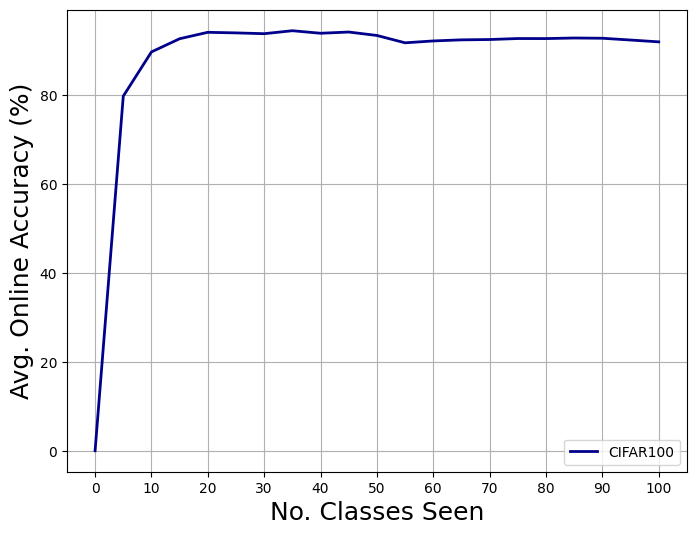

In [46]:
plot_single_accuracy(average_all1, class_per_exp=5, 
                     label = 'CIFAR100', 
                     save_path='figures/cifar_real_real.png'
                    )


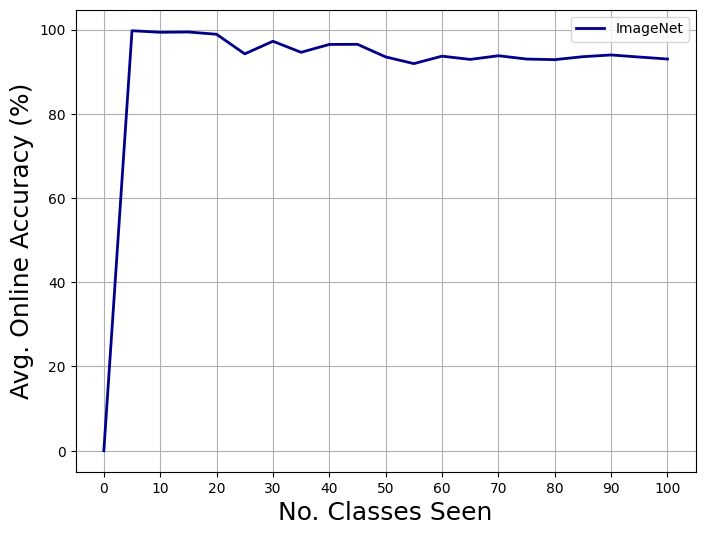

In [18]:
accuracy_dict2 = parse_log_file_class('logs/new_ocl_cifar_60real_40synsyni2i_step16_all500test_knn10.txt')
# accuracy_dict2 = parse_log_file_class('logs/ocl_imagenet_real_real_testall_knn10.txt')
accuracy_dict2 = parse_log_file_class('/storage3/enbo/logs/new_ocl_imagenet_80real_20synsyn_1.txt')
average_all2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, order_list)
average_syn2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, syn_classes)
average_real2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, real_classes)

plot_single_accuracy(average_all2, class_per_exp=5, 
                     label = 'ImageNet',
#                      save_path='figures/imagenet_real_real.png'
                    )


In [20]:
# accuracy_dict1 = parse_log_file_class('logs/cifar_80synreal_20synsyni2i.txt')
accuracy_dict1 = parse_log_file_class('logs/ocl_cifar_60real_40lessnumsynlesspromptlessimage_testall_knn10.txt')
accuracy_dict1 = parse_log_file_class('/storage3/enbo/logs/ocl_cifar_real_synreal_testallreallesssyn_knn10_1.txt')
accuracy_dict1 = parse_log_file_class('logs/new_ocl_imagenet_80real_nosynsyn.txt')
# accuracy_dict1 = parse_log_file_class('/storage3/enbo/logs/fixedbuffer_cifar_60synreallesspromptallimage_40samenumsynlesspromptsallimage_testall_knn10.txt')
# accuracy_dict1 = parse_log_file_class('logs/ocl_cifar_60real_40samenumsynlesspromptlessimage_testall_knn10.txt')
# accuracy_dict1 = parse_log_file_class('logs/ocl_cifar_60real_40lessnumsynlesspromptlessimage_testall_knn10.txt')
average_all1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, order_list)
average_syn1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, syn_classes)
average_real1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, real_classes)

In [21]:
# accuracy_dict2 = parse_log_file_class('logs/cifar_60synreal_40synsyni2i_s8g2_step16.txt')
accuracy_dict2 = parse_log_file_class('logs/new_ocl_cifar_80synreal_20synsyni2i_step16_all500test_knn10.txt')
average_all2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, order_list)
average_syn2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, syn_classes)
average_real2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, real_classes)

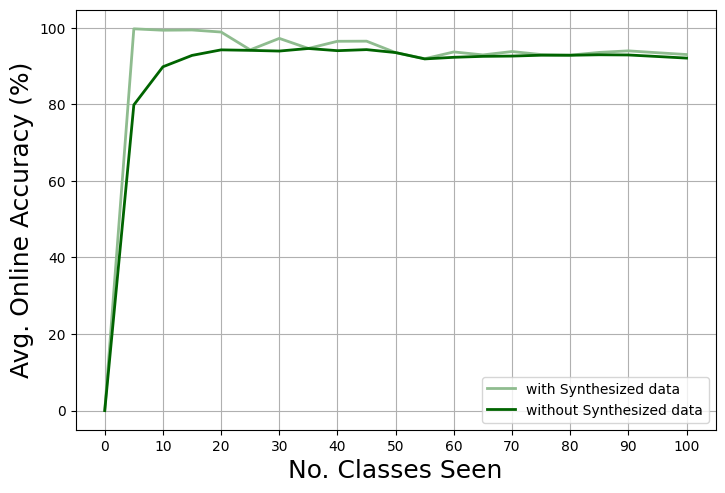

In [22]:
plot_two_accuracies(average_all2, average_all1, 
                        label1='with Synthesized data', label2='without Synthesized data', 
                        class_per_exp=5, 
#                         y_range = (70, 100),
#                         title='Online Accuracy Comparison', 
                        save_path='figures/imagenet_wwosynthetic_all.png'
                    
                    
                   )

In [ ]:
plot_two_accuracies(random_list2, average_all2, 
                        label1='Without Replay', label2='With Full Replay', 
                        class_per_exp=5, 
#                         y_range = (70, 100),
#                         title='Online Accuracy Comparison', 
                        save_path='figures/ocl_cifar_baseline.png'
        

In [22]:
# average_syn1 = calculate_running_average(average_syn1)
# average_real1 = calculate_running_average(average_real1)
# average_all1 = calculate_running_average(average_all1)

# average_syn2 = calculate_running_average(average_syn2)
# average_real2 = calculate_running_average(average_real2)
# average_all2 = calculate_running_average(average_all2)

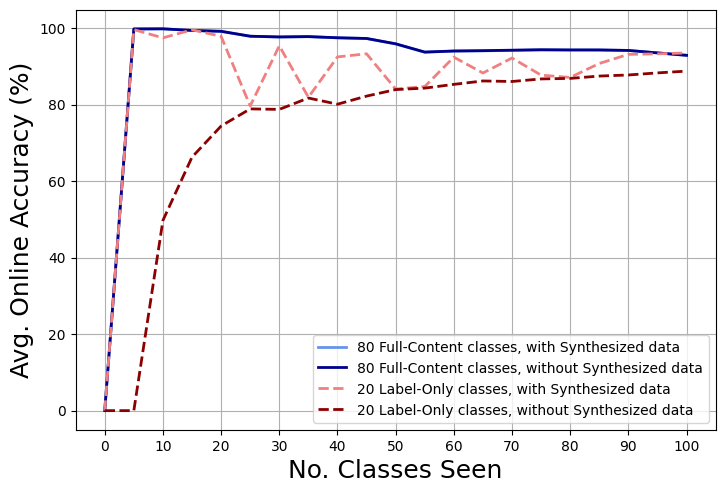

In [21]:
plot_twopairs_accuracies(average_real2, average_real1, 
                                  average_syn2, average_syn1,
                                  label1="80 Full-Content classes,", label2="20 Label-Only classes,",
                                 compare_label1 = 'with Synthesized data', compare_label2 = 'without Synthesized data',
                                  class_per_exp=5, 
#                                   title='Online Accuracy Comparison', 
                                  save_path='figures/imagenet_wwosynthetic_real_syn.png',
#                          y_range = (70, 100)
                        )

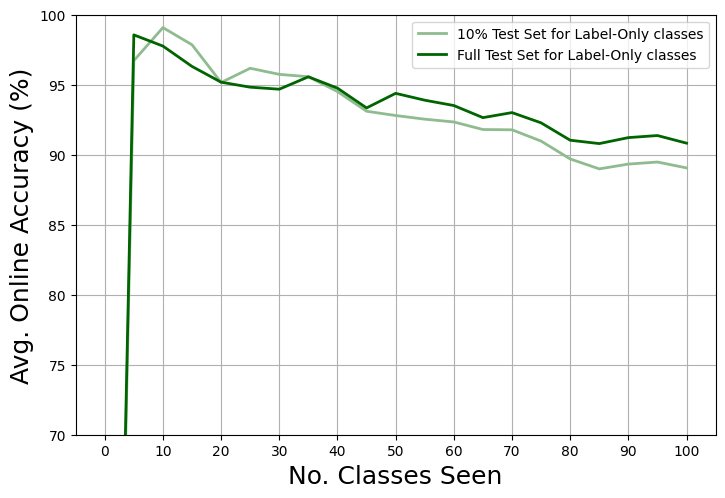

In [106]:
# plot_threepairs_accuracies(average_all1, average_all2, average_real1, average_real2, 
#                                   average_syn1, average_syn2,
#                                   label1="real", label2="synthetic", label3 = 'all',
#                                   class_per_exp=5, 
# #                                   title='Online Accuracy Comparison', 
#                                   save_path=None)

plot_two_accuracies(average_all1, average_all2, 
                        label1='10% Test Set for Label-Only classes', label2='Full Test Set for Label-Only classes', 
                        class_per_exp=5, 
                        y_range = (70, 100),
#                         title='Online Accuracy Comparison', 
                        save_path='figures/cifar_lesstestsyntheticeffect_all.png'
                    
                    
                   )


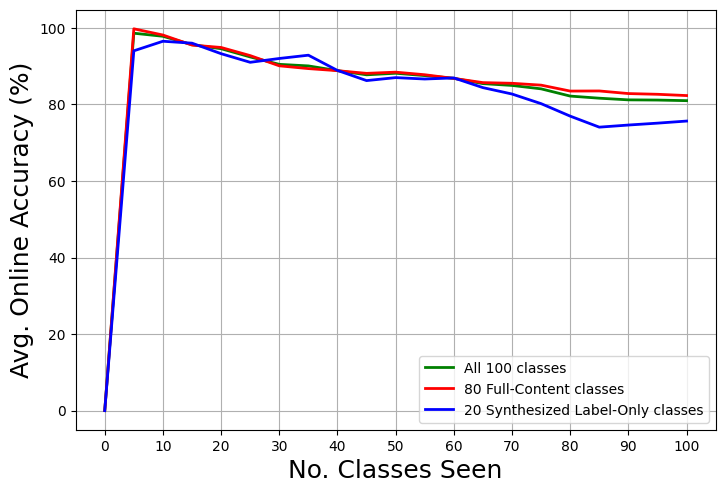

In [230]:
plot_three_accuracies(average_all1, average_real1, average_syn1, 
                        label1="All 100 classes", label2="80 Full-Content classes", label3="20 Synthesized Label-Only classes",
#                         data_points_per_exp=2500, 
#                         title='CIFAR100 Reprocessed Full-Content classes + Synthesized Label-Only classes', 
                        save_path= 'figures/cifar_80synreal_20synsyni2i.png')

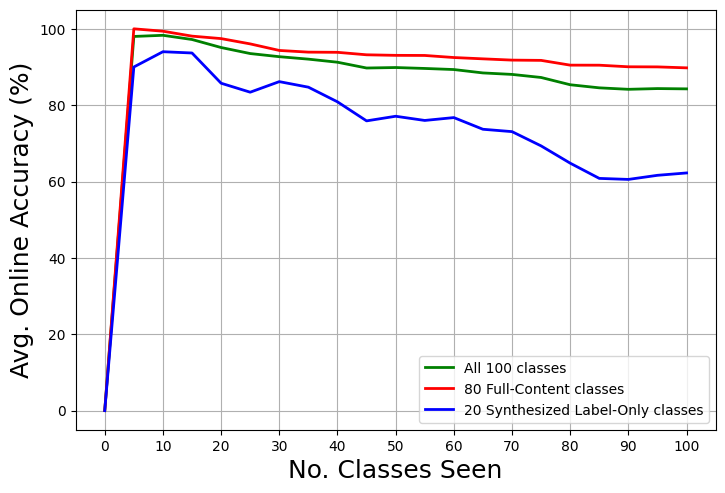

In [232]:
plot_three_accuracies(average_all2, average_real2, average_syn2, 
                        label1="All 100 classes", label2="80 Full-Content classes", label3="20 Synthesized Label-Only classes",
#                         data_points_per_exp=2500, 
#                         title='CIFAR100 real classes + synthetic classes', 
                        save_path='figures/cifar_80real_20synsyni2i.png')

In [26]:
accuracy_dict3 = parse_log_file_class('logs/imagenet_80synreal_20synsyni2i.txt')
average_all3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, order_list)
average_syn3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, syn_classes)
average_real3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, real_classes)

In [27]:
accuracy_dict4 = parse_log_file_class('logs/imagenet_80real_20synsyni2i.txt')
average_all4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, order_list)
average_syn4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, syn_classes)
average_real4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, real_classes)

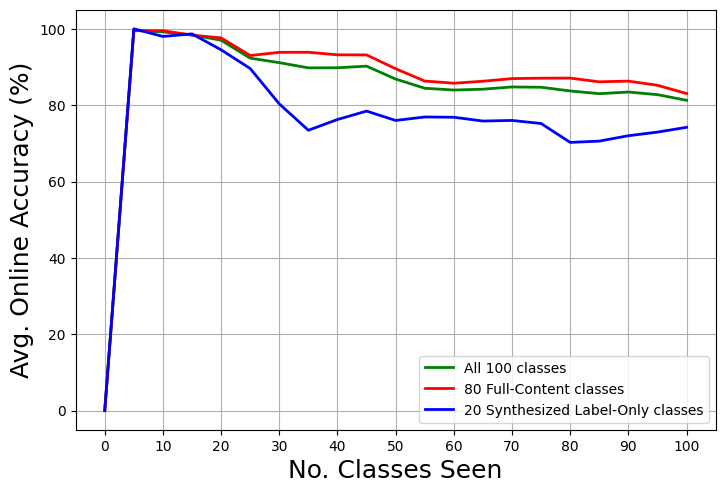

In [29]:
plot_three_accuracies(average_all3, average_real3, average_syn3, 
                        label1="All 100 classes", label2="80 Full-Content classes", label3="20 Synthesized Label-Only classes",
#                         data_points_per_exp=6500, 
#                         title='ImageNet Preprocessed real classes + synthetic classes', 
                        save_path='figures/imagenet_80synreal_20synsyni2i.png')

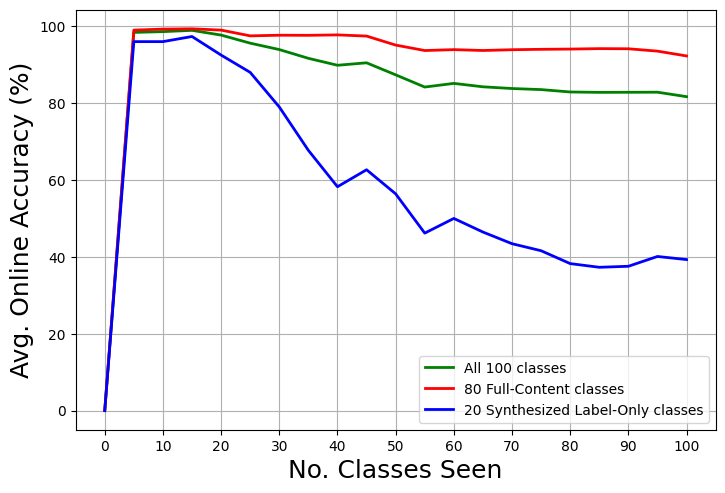

In [30]:
plot_three_accuracies(average_all4, average_real4, average_syn4, 
                        label1="All 100 classes", label2="80 Full-Content classes", label3="20 Synthesized Label-Only classes",
#                         data_points_per_exp=6500, 
#                         title='ImageNet real classes + synthetic classes', 
                        save_path='figures/imagenet_80real_20synsyni2i.png')


In [31]:
print(average_all3[-1], average_all4[-1], 
average_syn3[-1], average_syn4[-1])

81.28 81.68 74.2 39.3


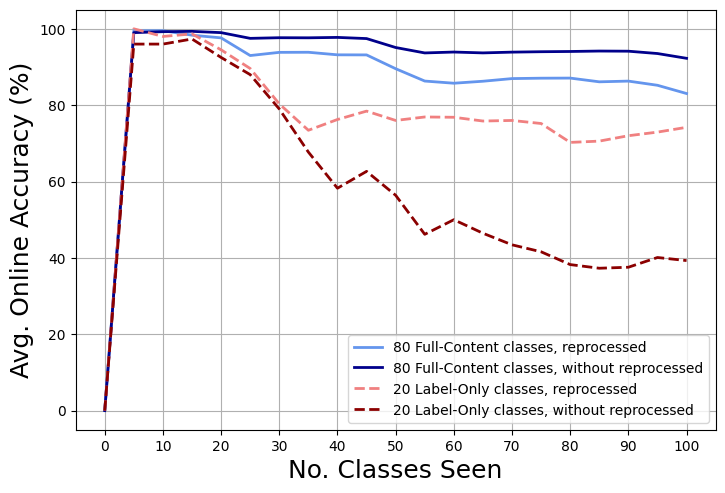

In [17]:
plot_twopairs_accuracies(average_real3, average_real4, 
                                  average_syn3, average_syn4,
                                  label1="80 Full-Content classes,", label2="20 Label-Only classes,",
                                 compare_label1 = 'reprocessed', compare_label2 = 'without reprocessed',
                                  class_per_exp=5, 
#                                   title='Online Accuracy Comparison', 
                                  save_path='figures/imagenet_preprocess_real_syn.png')

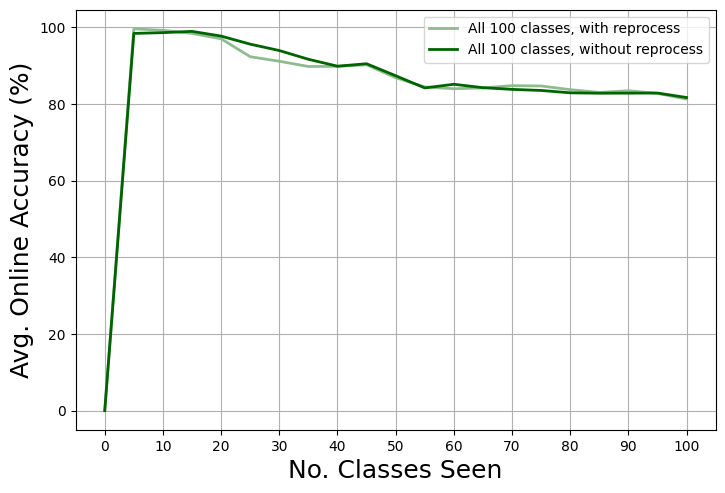

In [22]:
plot_two_accuracies(average_all3, average_all4, 
                        label1="All 100 classes, with reprocess", label2="All 100 classes, without reprocess", 
                        class_per_exp=5, 
#                         title='Online Accuracy Comparison', 
                        save_path='figures/imagenet_preprocess_all.png')


In [238]:
order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]
syn_classes = [order[3:] for order in order_list]
# syn_classes = [item for lists in syn_classes for item in lists]
print(syn_classes)
# real_classes = list(set([i for i in range(100)])-set(syn_classes))
real_classes = [order[:3] for order in order_list]
print(len(real_classes))

[[5, 20], [83, 19], [62, 33], [74, 53], [4, 32], [40, 41], [64, 21], [49, 68], [65, 46], [72, 31], [8, 1], [18, 86], [85, 95], [25, 82], [66, 37], [78, 52], [3, 99], [28, 90], [17, 77], [79, 58]]
20


In [42]:


accuracy_dict1 = parse_log_file_class('logs/new_ocl_cifar_60real_40synsyni2i_step16_all500test_knn10.txt')
average_all1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, order_list)
average_syn1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, syn_classes)
average_real1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, real_classes)

In [43]:


accuracy_dict2 = parse_log_file_class('logs/new_ocl_cifar_60real_nosynsyn_step16_all500test_knn10.txt')
average_all2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, order_list)
average_syn2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, syn_classes)
average_real2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, real_classes)

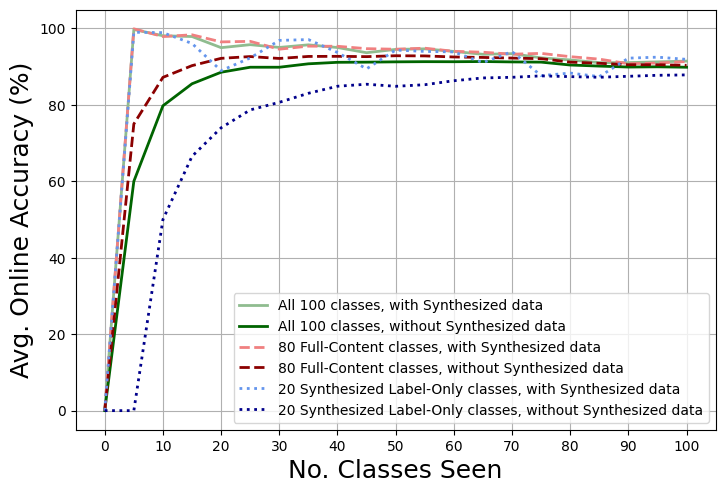

In [44]:
plot_threepairs_accuracies(average_all1, average_all2, average_real1, average_real2, 
                                  average_syn1, average_syn2,
                                  label1="All 100 classes,", label2="80 Full-Content classes,", label3 = '20 Synthesized Label-Only classes,',
                               compare_label1 = 'with Synthesized data', compare_label2 = 'without Synthesized data',
#                                   data_points_per_exp=2500, 
#                                   title='Online Accuracy Comparison', 
                                  save_path=None)

In [47]:
print(average_all1[-1], 
average_all2[-1], 
average_real1[-1], 
average_real2[-1], 
average_syn1[-1], 
average_syn2[-1])

91.456 89.848 91.34250000000002 90.35000000000002 91.91 87.84


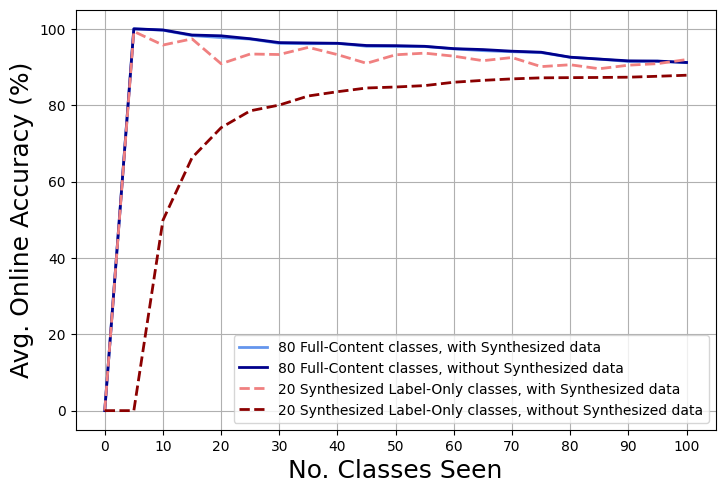

In [245]:
plot_twopairs_accuracies(average_real1, average_real2, 
                                  average_syn1, average_syn2,
                                label1="80 Full-Content classes,", label2 = '20 Synthesized Label-Only classes,',
                               compare_label1 = 'with Synthesized data', compare_label2 = 'without Synthesized data',
#                                   data_points_per_exp=2500, 
#                                   title='Online Accuracy Comparison', 
                                  save_path='figures/cifar_ocl_real_syn.png')

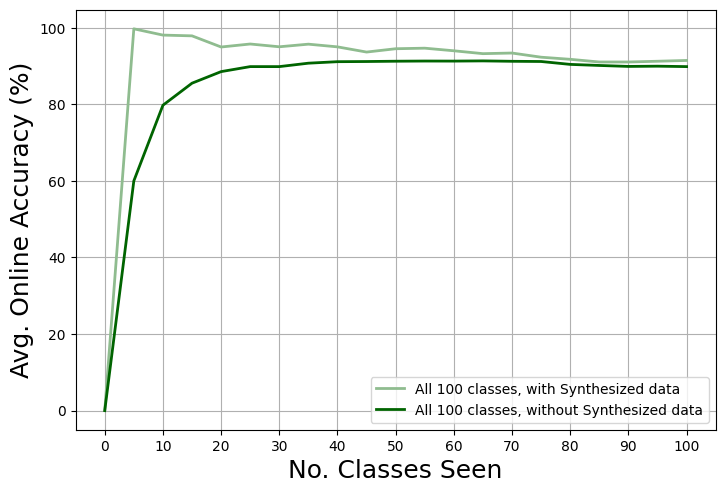

In [251]:
plot_two_accuracies(average_all1, average_all2, 
                        label1="All 100 classes, with Synthesized data", label2="All 100 classes, without Synthesized data", 
                        class_per_exp=5, 
#                         title='Online Accuracy Comparison', 
                        save_path='figures/cifar_ocl_all100.png')


In [11]:
order_list = [[36, 0, 54, 5, 20],
 [22, 45, 13, 83, 19],
 [26, 73, 16, 62, 33],
 [34, 98, 24, 74, 53],
 [10, 94, 51, 4, 32],
 [38, 81, 50, 40, 41],
 [30, 89, 69, 64, 21],
 [84, 14, 88, 49, 68],
 [6, 80, 57, 65, 46],
 [9, 91, 48, 72, 31],
 [76, 7, 47, 8, 1],
 [61, 75, 63, 18, 86],
 [59, 70, 43, 85, 95],
 [27, 93, 35, 25, 82],
 [44, 56, 67, 66, 37],
 [60, 11, 2, 78, 52],
 [97, 39, 55, 3, 99],
 [29, 71, 23, 28, 90],
 [87, 15, 92, 17, 77],
 [12, 42, 96, 79, 58]]


In [12]:
# 80 real 20 syn
syn_index = 4
syn_classes20 = [order[syn_index:] for order in order_list]
print(syn_classes20)
real_classes80 = [order[:syn_index] for order in order_list]

accuracy_dict1 = parse_log_file_class('logs/imagenet_80real_20synsyni2i.txt')
average_all1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, order_list)
average_syn1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, syn_classes20)
average_real1 = calculate_average_ocl_accuracies_from_dict(accuracy_dict1, real_classes80)


accuracy_dict2 = parse_log_file_class('logs/imagenet_80synreal_20synsyni2i.txt')
average_all2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, order_list)
average_syn2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, syn_classes20)
average_real2 = calculate_average_ocl_accuracies_from_dict(accuracy_dict2, real_classes80)

[[20], [19], [33], [53], [32], [41], [21], [68], [46], [31], [1], [86], [95], [82], [37], [52], [99], [90], [77], [58]]


In [13]:
# 60 real 40 syn

syn_index = 3
syn_classes40 = [order[syn_index:] for order in order_list]
print(syn_classes40)
real_classes60 = [order[:syn_index] for order in order_list]

accuracy_dict3 = parse_log_file_class('logs/imagenet_realreal_synsyni2is8g2.txt')
average_all3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, order_list)
average_syn3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, syn_classes40)
average_real3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, real_classes60)

accuracy_dict4 = parse_log_file_class('logs/imagenet_synrealallprompti2i_synsyni2is8g2.txt')
average_all4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, order_list)
average_syn4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, syn_classes40)
average_real4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, real_classes60)

[[5, 20], [83, 19], [62, 33], [74, 53], [4, 32], [40, 41], [64, 21], [49, 68], [65, 46], [72, 31], [8, 1], [18, 86], [85, 95], [25, 82], [66, 37], [78, 52], [3, 99], [28, 90], [17, 77], [79, 58]]


In [14]:
# 40 real 60 syn

syn_index = 2
syn_classes60 = [order[syn_index:] for order in order_list]
print(syn_classes60)
real_classes40 = [order[:syn_index] for order in order_list]

accuracy_dict5 = parse_log_file_class('logs/imagenet_40real_60synsyni2i.txt')
average_all5 = calculate_average_ocl_accuracies_from_dict(accuracy_dict5, order_list)
average_syn5 = calculate_average_ocl_accuracies_from_dict(accuracy_dict5, syn_classes60)
average_real5 = calculate_average_ocl_accuracies_from_dict(accuracy_dict5, real_classes40)

accuracy_dict6 = parse_log_file_class('logs/imagenet_40synreal_60synsyni2i.txt')
average_all6 = calculate_average_ocl_accuracies_from_dict(accuracy_dict6, order_list)
average_syn6 = calculate_average_ocl_accuracies_from_dict(accuracy_dict6, syn_classes60)
average_real6 = calculate_average_ocl_accuracies_from_dict(accuracy_dict6, real_classes40)

[[54, 5, 20], [13, 83, 19], [16, 62, 33], [24, 74, 53], [51, 4, 32], [50, 40, 41], [69, 64, 21], [88, 49, 68], [57, 65, 46], [48, 72, 31], [47, 8, 1], [63, 18, 86], [43, 85, 95], [35, 25, 82], [67, 66, 37], [2, 78, 52], [55, 3, 99], [23, 28, 90], [92, 17, 77], [96, 79, 58]]


In [15]:
# 20 real 80 syn
syn_index = 1
syn_classes80 = [order[syn_index:] for order in order_list]
print(syn_classes80)
real_classes20 = [order[:syn_index] for order in order_list]


accuracy_dict7 = parse_log_file_class('logs/imagenet_20real_80synsyni2i.txt')
average_all7 = calculate_average_ocl_accuracies_from_dict(accuracy_dict7, order_list)
average_syn7 = calculate_average_ocl_accuracies_from_dict(accuracy_dict7, syn_classes80)
average_real7 = calculate_average_ocl_accuracies_from_dict(accuracy_dict7, real_classes20)

accuracy_dict8 = parse_log_file_class('logs/imagenet_20synreal_80synsyni2i.txt')
average_all8 = calculate_average_ocl_accuracies_from_dict(accuracy_dict8, order_list)
average_syn8 = calculate_average_ocl_accuracies_from_dict(accuracy_dict8, syn_classes80)
average_real8 = calculate_average_ocl_accuracies_from_dict(accuracy_dict8, real_classes20)



[[0, 54, 5, 20], [45, 13, 83, 19], [73, 16, 62, 33], [98, 24, 74, 53], [94, 51, 4, 32], [81, 50, 40, 41], [89, 69, 64, 21], [14, 88, 49, 68], [80, 57, 65, 46], [91, 48, 72, 31], [7, 47, 8, 1], [75, 63, 18, 86], [70, 43, 85, 95], [93, 35, 25, 82], [56, 67, 66, 37], [11, 2, 78, 52], [39, 55, 3, 99], [71, 23, 28, 90], [15, 92, 17, 77], [42, 96, 79, 58]]


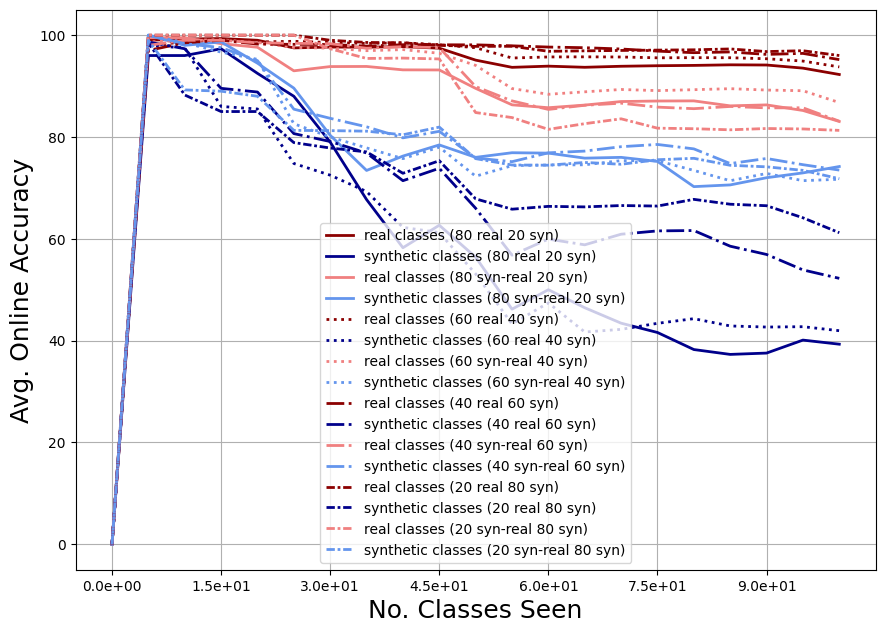

In [281]:
# imagenet
plot_eight_pairs_of_accuracies(average_real1, average_syn1, average_real2, average_syn2, 
                                   average_real3, average_syn3, average_real4, average_syn4,
                                   average_real5, average_syn5, average_real6, average_syn6,
                                   average_real7, average_syn7, average_real8, average_syn8,
                                   label1="real classes", label2="synthetic classes", 
#                                    data_points_per_exp=6500, 
#                                    title='ImageNet Online Accuracy Comparison', 
                                   save_path='figures/imagenet_fixedbuffer_ratio_real_syn.png')

In [16]:
synreal80 = [average_all2[-1], average_real2[-1], average_syn2[-1]]
synreal60 = [average_all4[-1], average_real4[-1], average_syn4[-1]]
synreal40 = [average_all6[-1], average_real6[-1], average_syn6[-1]]
synreal20 = [average_all8[-1], average_real8[-1], average_syn8[-1]]

In [20]:
synreal20

[73.7, 81.3, 71.8]

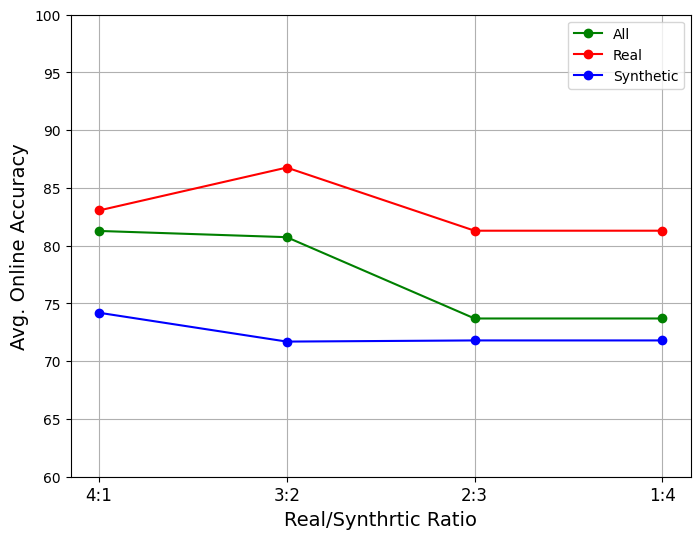

In [58]:
plot_experimental_results(synreal80, synreal60, synreal20, synreal20, 
                              ['4:1', '3:2', '2:3', '1:4'], 
#                               title='ImageNet Results Comparison', 
                              y_label='Avg. Online Accuracy', 
                              save_path='figures/imagenet_fixedbuffer_ratio_last.png')

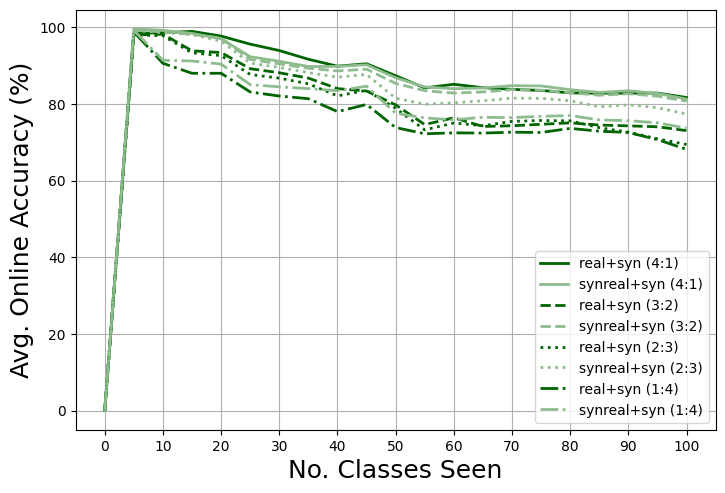

In [278]:
plot_eight_accuracies(average_all1, average_all2, average_all3, average_all4, 
                                  average_all5, average_all6, average_all7, average_all8,
#                                   data_points_per_exp=6500, 
#                                   title='ImageNet Online Accuracy Comparison 100 classes', 
                                  save_path='figures/imagenet_fixedbuffer_ratio_all.png')

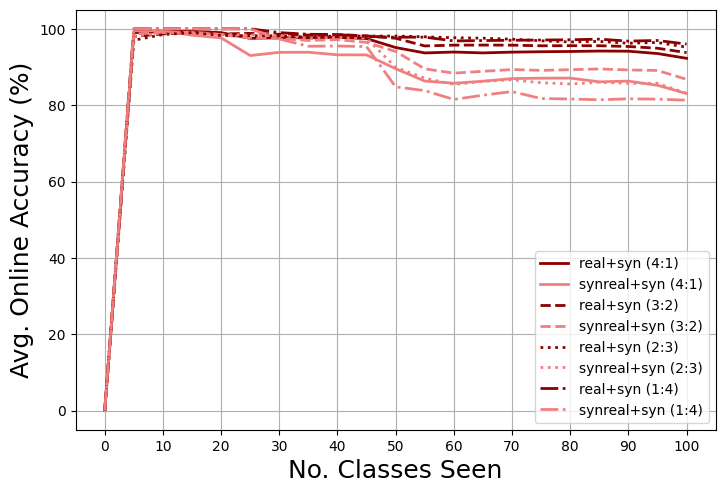

In [279]:
plot_eight_accuracies(average_real1, average_real2, average_real3, average_real4, 
                                  average_real5, average_real6, average_real7, average_real8, 
                                  color1 = 'darkred', color2 = 'lightcoral',
#                                   data_points_per_exp=6500, 
#                                   title='ImageNet Online Accuracy Comparison 100 classes', 
                                  save_path='figures/imagenet_fixedbuffer_ratio_real.png')

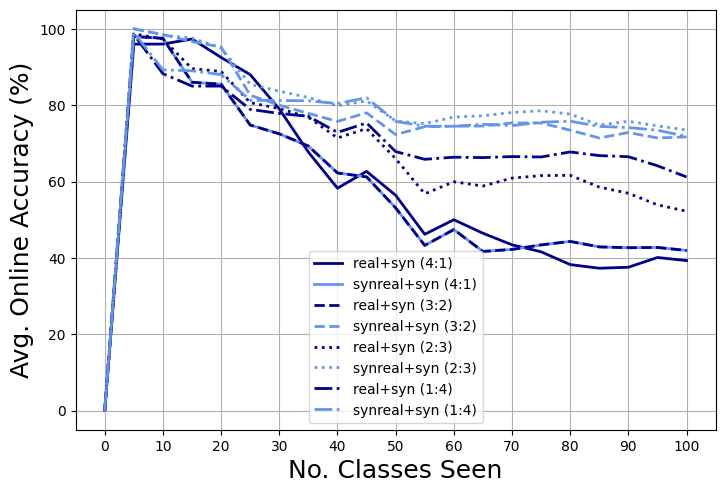

In [280]:
plot_eight_accuracies(average_syn1, average_syn3, average_syn3, average_syn4, 
                                  average_syn5, average_syn6, average_syn7, average_syn8, 
                                  color1 = 'darkblue', color2 = 'cornflowerblue',
#                                   data_points_per_exp=6500, 
#                                   title='ImageNet Online Accuracy Comparison 100 classes', 
                                  save_path='figures/imagenet_fixedbuffer_ratio_syn.png')

In [50]:
# 80 real 20 syn

# syn_classes20 = [order[4:] for order in order_list]
# syn_classes20 = [item for lists in syn_classes20 for item in lists]
# print(syn_classes20)
# real_classes80 = list(set([i for i in range(100)])-set(syn_classes20))
# print(len(real_classes80))

# cifar_accuracy_dict1 = parse_log_file_class('logs/cifar_80real_20synsyni2i.txt')
# cifar_average_syn1 = calculate_average_accuracies_from_dict(cifar_accuracy_dict1, syn_classes20)
# cifar_average_real1 = calculate_average_accuracies_from_dict(cifar_accuracy_dict1, real_classes80)
# cifar_accuracies1 = extract_accuracies('logs/cifar_80real_20synsyni2i.txt')

# cifar_accuracy_dict2 = parse_log_file_class('logs/cifar_80synreal_20synsyni2i.txt')
# cifar_average_syn2 = calculate_average_accuracies_from_dict(cifar_accuracy_dict2, syn_classes20)
# cifar_average_real2 = calculate_average_accuracies_from_dict(cifar_accuracy_dict2, real_classes80)
# cifar_accuracies2 = extract_accuracies('logs/cifar_80synreal_20synsyni2i.txt')


syn_index = 4
syn_classes20 = [order[syn_index:] for order in order_list]
print(syn_classes20)
real_classes80 = [order[:syn_index] for order in order_list]

cifar_accuracy_dict1 = parse_log_file_class('logs/cifar_80real_20synsyni2i.txt')
cifar_average_all1 = calculate_average_ocl_accuracies_from_dict(cifar_accuracy_dict1, order_list)
cifar_average_syn1 = calculate_average_ocl_accuracies_from_dict(cifar_accuracy_dict1, syn_classes20)
cifar_average_real1 = calculate_average_ocl_accuracies_from_dict(cifar_accuracy_dict1, real_classes80)


cifar_accuracy_dict2 = parse_log_file_class('logs/cifar_80synreal_20synsyni2i.txt')
cifar_average_all2 = calculate_average_ocl_accuracies_from_dict(cifar_accuracy_dict2, order_list)
cifar_average_syn2 = calculate_average_ocl_accuracies_from_dict(cifar_accuracy_dict2, syn_classes20)
cifar_average_real2 = calculate_average_ocl_accuracies_from_dict(cifar_accuracy_dict2, real_classes80)

[[20], [19], [33], [53], [32], [41], [21], [68], [46], [31], [1], [86], [95], [82], [37], [52], [99], [90], [77], [58]]


In [51]:
# 60 real 40 syn

# syn_classes40 = [order[3:] for order in order_list]
# syn_classes40 = [item for lists in syn_classes40 for item in lists]
# print(syn_classes40)
# real_classes60 = list(set([i for i in range(100)])-set(syn_classes40))
# print(len(real_classes60))

# cifar_accuracy_dict3 = parse_log_file_class('logs/cifar_60real_40synsyni2i.txt')
# cifar_average_syn3 = calculate_average_accuracies_from_dict(cifar_accuracy_dict3, syn_classes40)
# cifar_average_real3 = calculate_average_accuracies_from_dict(cifar_accuracy_dict3, real_classes60)
# cifar_accuracies3 = extract_accuracies('logs/cifar_60real_40synsyni2i.txt')

# cifar_accuracy_dict4 = parse_log_file_class('logs/cifar_60synreali2i_40synsyni2i.txt')
# cifar_average_syn4 = calculate_average_accuracies_from_dict(cifar_accuracy_dict4, syn_classes40)
# cifar_average_real4 = calculate_average_accuracies_from_dict(cifar_accuracy_dict4, real_classes60)
# cifar_accuracies4 = extract_accuracies('logs/cifar_60synreali2i_40synsyni2i.txt')

syn_index = 3
syn_classes40 = [order[syn_index:] for order in order_list]
print(syn_classes40)
real_classes60 = [order[:syn_index] for order in order_list]

cifar_accuracy_dict3 = parse_log_file_class('logs/cifar_60real_40synsyni2i.txt')
cifar_average_all3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, order_list)
cifar_average_syn3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, syn_classes40)
cifar_average_real3 = calculate_average_ocl_accuracies_from_dict(accuracy_dict3, real_classes60)


cifar_accuracy_dict4 = parse_log_file_class('logs/cifar_60synreali2i_40synsyni2i.txt')
cifar_average_all4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, order_list)
cifar_average_syn4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, syn_classes40)
cifar_average_real4 = calculate_average_ocl_accuracies_from_dict(accuracy_dict4, real_classes60)

[[5, 20], [83, 19], [62, 33], [74, 53], [4, 32], [40, 41], [64, 21], [49, 68], [65, 46], [72, 31], [8, 1], [18, 86], [85, 95], [25, 82], [66, 37], [78, 52], [3, 99], [28, 90], [17, 77], [79, 58]]


In [52]:
# 40 real 60 syn

# syn_classes60 = [order[2:] for order in order_list]
# syn_classes60 = [item for lists in syn_classes60 for item in lists]
# print(syn_classes60)
# real_classes40 = list(set([i for i in range(100)])-set(syn_classes60))
# print(len(real_classes40))

# cifar_accuracy_dict5 = parse_log_file_class('logs/cifar_40real_60synsyni2i.txt')
# cifar_average_syn5 = calculate_average_accuracies_from_dict(cifar_accuracy_dict5, syn_classes60)
# cifar_average_real5 = calculate_average_accuracies_from_dict(cifar_accuracy_dict5, real_classes40)
# cifar_accuracies5 = extract_accuracies('logs/cifar_40real_60synsyni2i.txt')

# cifar_accuracy_dict6 = parse_log_file_class('logs/cifar_40synreal_60synsyni2i.txt')
# cifar_average_syn6 = calculate_average_accuracies_from_dict(cifar_accuracy_dict6, syn_classes60)
# cifar_average_real6 = calculate_average_accuracies_from_dict(cifar_accuracy_dict6, real_classes40)
# cifar_accuracies6 = extract_accuracies('logs/cifar_40synreal_60synsyni2i.txt')

syn_index = 2
syn_classes60 = [order[syn_index:] for order in order_list]
print(syn_classes60)
real_classes40 = [order[:syn_index] for order in order_list]

cifar_accuracy_dict5 = parse_log_file_class('logs/cifar_40real_60synsyni2i.txt')
cifar_average_all5 = calculate_average_ocl_accuracies_from_dict(accuracy_dict5, order_list)
cifar_average_syn5 = calculate_average_ocl_accuracies_from_dict(accuracy_dict5, syn_classes60)
cifar_average_real5 = calculate_average_ocl_accuracies_from_dict(accuracy_dict5, real_classes40)


cifar_accuracy_dict6 = parse_log_file_class('logs/cifar_40synreal_60synsyni2i.txt')
cifar_average_all6 = calculate_average_ocl_accuracies_from_dict(accuracy_dict6, order_list)
cifar_average_syn6 = calculate_average_ocl_accuracies_from_dict(accuracy_dict6, syn_classes60)
cifar_average_real6 = calculate_average_ocl_accuracies_from_dict(accuracy_dict6, real_classes40)

[[54, 5, 20], [13, 83, 19], [16, 62, 33], [24, 74, 53], [51, 4, 32], [50, 40, 41], [69, 64, 21], [88, 49, 68], [57, 65, 46], [48, 72, 31], [47, 8, 1], [63, 18, 86], [43, 85, 95], [35, 25, 82], [67, 66, 37], [2, 78, 52], [55, 3, 99], [23, 28, 90], [92, 17, 77], [96, 79, 58]]


In [53]:
# 20 real 80 syn
# syn_classes80 = [order[1:] for order in order_list]
# syn_classes80 = [item for lists in syn_classes80 for item in lists]
# print(syn_classes80)
# real_classes20 = list(set([i for i in range(100)])-set(syn_classes80))
# print(len(real_classes20))

# cifar_accuracy_dict7 = parse_log_file_class('logs/cifar_20real_80synsyni2i.txt')
# cifar_average_syn7 = calculate_average_accuracies_from_dict(cifar_accuracy_dict7, syn_classes80)
# cifar_average_real7 = calculate_average_accuracies_from_dict(cifar_accuracy_dict7, real_classes20)
# cifar_accuracies7 = extract_accuracies('logs/cifar_20real_80synsyni2i.txt')

# cifar_accuracy_dict8 = parse_log_file_class('logs/cifar_20synreal_80synsyni2i.txt')
# cifar_average_syn8 = calculate_average_accuracies_from_dict(cifar_accuracy_dict8, syn_classes80)
# cifar_average_real8 = calculate_average_accuracies_from_dict(cifar_accuracy_dict8, real_classes20)
# cifar_accuracies8 = extract_accuracies('logs/cifar_20synreal_80synsyni2i.txt')
syn_index = 1
syn_classes80 = [order[syn_index:] for order in order_list]
print(syn_classes80)
real_classes20 = [order[:syn_index] for order in order_list]

cifar_accuracy_dict7 = parse_log_file_class('logs/cifar_20real_80synsyni2i.txt')
cifar_average_all7 = calculate_average_ocl_accuracies_from_dict(accuracy_dict7, order_list)
cifar_average_syn7 = calculate_average_ocl_accuracies_from_dict(accuracy_dict7, syn_classes80)
cifar_average_real7 = calculate_average_ocl_accuracies_from_dict(accuracy_dict7, real_classes20)


cifar_accuracy_dict8 = parse_log_file_class('logs/cifar_20synreal_80synsyni2i.txt')
cifar_average_all8 = calculate_average_ocl_accuracies_from_dict(accuracy_dict8, order_list)
cifar_average_syn8 = calculate_average_ocl_accuracies_from_dict(accuracy_dict8, syn_classes80)
cifar_average_real8 = calculate_average_ocl_accuracies_from_dict(accuracy_dict8, real_classes20)


[[0, 54, 5, 20], [45, 13, 83, 19], [73, 16, 62, 33], [98, 24, 74, 53], [94, 51, 4, 32], [81, 50, 40, 41], [89, 69, 64, 21], [14, 88, 49, 68], [80, 57, 65, 46], [91, 48, 72, 31], [7, 47, 8, 1], [75, 63, 18, 86], [70, 43, 85, 95], [93, 35, 25, 82], [56, 67, 66, 37], [11, 2, 78, 52], [39, 55, 3, 99], [71, 23, 28, 90], [15, 92, 17, 77], [42, 96, 79, 58]]


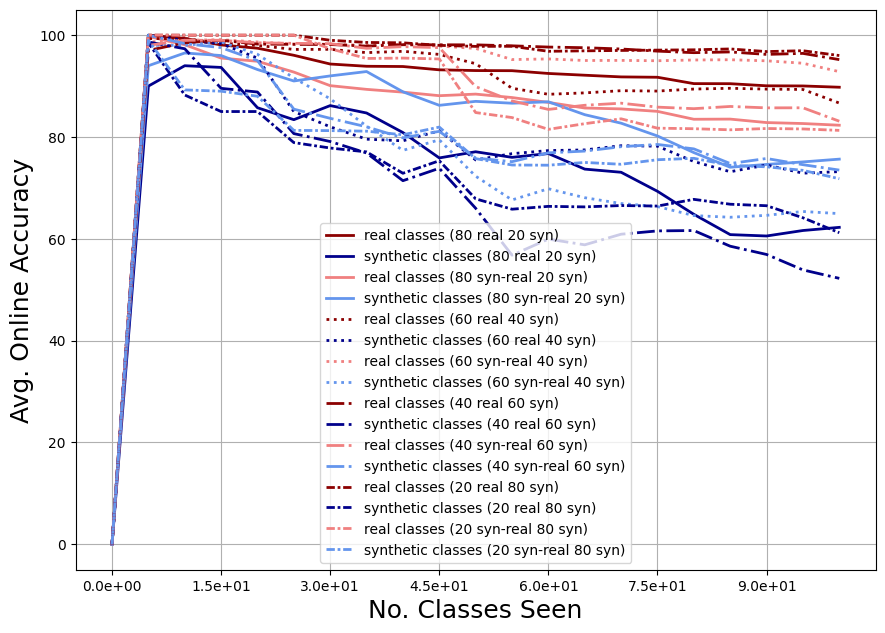

In [54]:
# imagenet
plot_eight_pairs_of_accuracies(cifar_average_real1, cifar_average_syn1, cifar_average_real2, cifar_average_syn2, 
                                   cifar_average_real3, cifar_average_syn3, cifar_average_real4, cifar_average_syn4,
                                   cifar_average_real5, cifar_average_syn5, cifar_average_real6, cifar_average_syn6,
                                   cifar_average_real7, cifar_average_syn7, cifar_average_real8, cifar_average_syn8,
                                   label1="real classes", label2="synthetic classes", 
#                                    data_points_per_exp=2500, 
#                                    title='CIFAR100 Online Accuracy Comparison', 
                                   save_path='figures/cifar_fixedbuffer_ratio_real_syn.png')


In [55]:
cifar_synreal80 = [cifar_average_all2[-1], cifar_average_real2[-1], cifar_average_syn2[-1]]
cifar_synreal60 = [cifar_average_all4[-1], cifar_average_real4[-1], cifar_average_syn4[-1]]
cifar_synreal40 = [cifar_average_all6[-1], cifar_average_real6[-1], cifar_average_syn6[-1]]
cifar_synreal20 = [cifar_average_all8[-1], cifar_average_real8[-1], cifar_average_syn8[-1]]

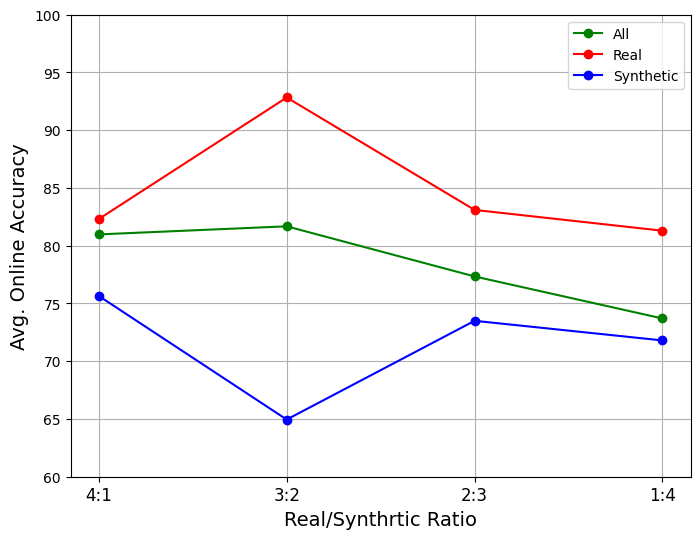

In [57]:
plot_experimental_results(cifar_synreal80, cifar_synreal60, cifar_synreal40, cifar_synreal20, 
                              ['4:1', '3:2', '2:3', '1:4'], 
#                               title='CIFAR100 Results Ratio Comparison', 
                              y_label='Avg. Online Accuracy', 
                              save_path='figures/cifar_fixedbuffer_ratio_last.png')

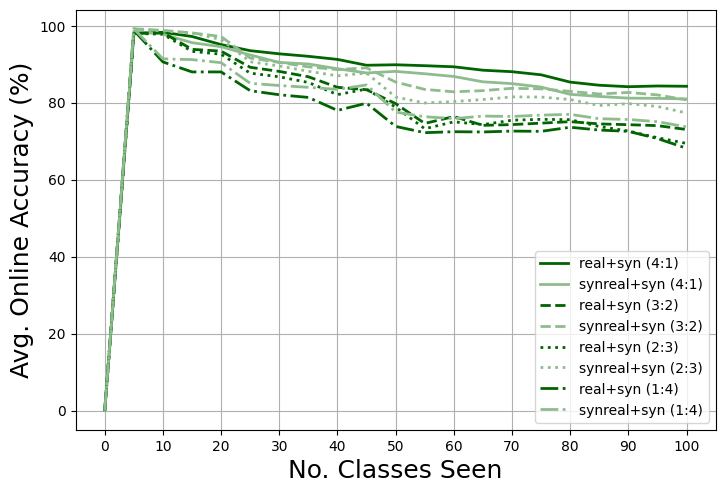

In [296]:
plot_eight_accuracies(cifar_average_all1, cifar_average_all2, cifar_average_all3, cifar_average_all4, 
                                  cifar_average_all5, cifar_average_all6, cifar_average_all7, cifar_average_all8, 
#                                   data_points_per_exp=2500, 
#                                   title='CIFAR100 Online Accuracy Comparison 100 classes', 
                                  save_path='figures/cifar_fixedbuffer_ratio_all.png')

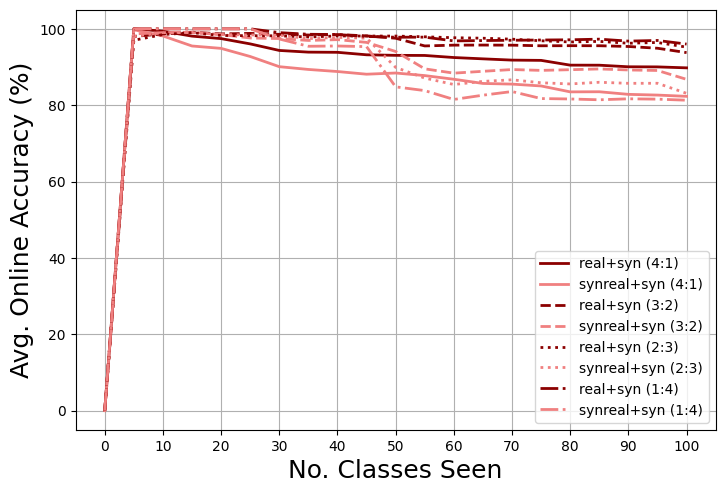

In [294]:
plot_eight_accuracies(cifar_average_real1, cifar_average_real2, cifar_average_real3, cifar_average_real4,
                                  cifar_average_real5, cifar_average_real6, cifar_average_real7, cifar_average_real8,
                                  color1 = 'darkred', color2 = 'lightcoral',
#                                   data_points_per_exp=6500, 
#                                   title='ImageNet Online Accuracy Comparison 100 classes', 
                                  save_path='figures/cifar_fixedbuffer_ratio_real.png')

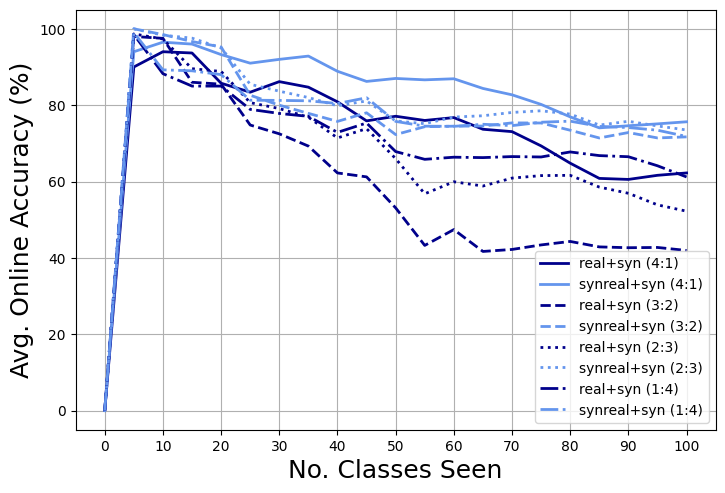

In [295]:
plot_eight_accuracies(cifar_average_syn1, cifar_average_syn2, cifar_average_syn3, cifar_average_syn4, 
                                  cifar_average_syn5, cifar_average_syn6, cifar_average_syn7, cifar_average_syn8, 
                                  color1 = 'darkblue', color2 = 'cornflowerblue',
#                                   data_points_per_exp=6500, 
#                                   title='ImageNet Online Accuracy Comparison 100 classes', 
                                  save_path='figures/cifar_fixedbuffer_ratio_syn.png')

## step

In [242]:
syn_classes20 = [order[4:] for order in order_list]
syn_classes20 = [item for lists in syn_classes20 for item in lists]
print(syn_classes20)
real_classes80 = list(set([i for i in range(100)])-set(syn_classes20))
print(len(real_classes80))

cifar_step_accuracy_dict1 = parse_log_file_class('logs/cifar_80synreal_20synsyni2i_step8.txt')
cifar_step_average_syn1 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict1, syn_classes20)
cifar_step_average_real1 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict1, real_classes80)
cifar_step_accuracies1 = extract_accuracies('logs/cifar_80synreal_20synsyni2i_step8.txt')

cifar_step_accuracy_dict2 = parse_log_file_class('logs/cifar_80synreal_20synsyni2i_step16.txt')
cifar_step_average_syn2 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict2, syn_classes20)
cifar_step_average_real2 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict2, real_classes80)
cifar_step_accuracies2 = extract_accuracies('logs/cifar_80synreal_20synsyni2i_step16.txt')


[20, 19, 33, 53, 32, 41, 21, 68, 46, 31, 1, 86, 95, 82, 37, 52, 99, 90, 77, 58]
80
20
20
20
20


In [243]:
cifar_step_accuracy_dict3 = parse_log_file_class('logs/cifar_80synreal_20synsyni2i_step20.txt')
cifar_step_average_syn3 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict3, syn_classes20)
cifar_step_average_real3 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict3, real_classes80)
cifar_step_accuracies3 = extract_accuracies('logs/cifar_80synreal_20synsyni2i_step20.txt')

cifar_step_accuracy_dict4 = parse_log_file_class('logs/cifar_80synreal_20synsyni2i_step28.txt')
cifar_step_average_syn4 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict4, syn_classes20)
cifar_step_average_real4 = calculate_average_accuracies_from_dict(cifar_step_accuracy_dict4, real_classes80)
cifar_step_accuracies4 = extract_accuracies('logs/cifar_80synreal_20synsyni2i_step28.txt')


20
20
20
20


In [244]:
cifar_synreal80_step8 = [cifar_step_accuracies1[-1], cifar_step_average_real1[-1], cifar_step_average_syn1[-1]]
cifar_synreal80_step16 = [cifar_step_accuracies2[-1], cifar_step_average_real2[-1], cifar_step_average_syn2[-1]]
cifar_synreal80_step20 = [cifar_step_accuracies3[-1], cifar_step_average_real3[-1], cifar_step_average_syn3[-1]]
cifar_synreal80_step28 = [cifar_step_accuracies4[-1], cifar_step_average_real4[-1], cifar_step_average_syn4[-1]]



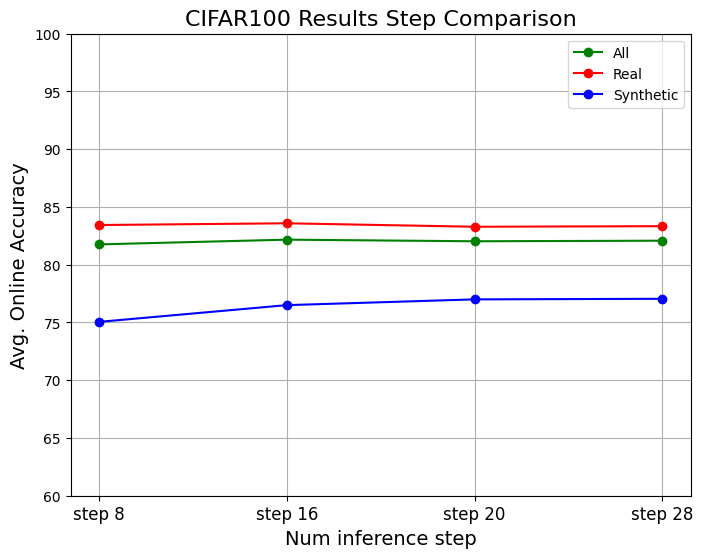

In [245]:
plot_experimental_results(cifar_synreal80_step8, cifar_synreal80_step16, cifar_synreal80_step20, cifar_synreal80_step28, 
                              ['step 8', 'step 16', 'step 20', 'step 28'], 
                              title='CIFAR100 Results Step Comparison', 
                              x_label = 'Num inference step',
                              y_label='Avg. Online Accuracy', 
                              save_path=None)